# Applied Machine Learning Final Project Home Credit Default Risk
## Group-06-HCDR
### Durga Sai Sailesh Chodabattula, Manideep Varma Penumatsa, Sahith Reddy Peddireddy, Madhumitha Reddy Muduganti.

![Title](./i2.png)

![Title](./i1.png)

# Absract

We will be working on the Home Credit Default Risk problem for our Final Project. Due to the lack of credit history, many people struggle to get loans. This project aims to ensure that the clients who can pay back their loans are not rejected. It will also enable Home Credit to give its clients a better repayment experience. To make sure that these individuals have a positive experience with their loans, Home Credit uses various data sources such as transactional information, etc. to predict their repayment abilities
We propose that we evaluate a few Machine learning models, such as logistic regression, XGBClassifier, and Neural Network, and determine the best model for the prediction.


Since our project aim is to make loans available to customers with no credit histories to that aim, we'll examine the data while keeping in mind that many of the people who take out loans have little to no credit history. Machine Learning Algorithms For this project we plan to use Naive Bayes, Logistic Regression, XGBClassifier/ LGBM, Deep learning.

- Phase 1 Results:
- - We used Logistic Regression as Baseline model which resulted in ROCAUC score 0.7394 and test accuracy of 91.7%.

- Phase 2 Results:
- - We added 11 features and were able to increase our ROC_AUC score from 0.7403 to 0.745 using Logistic Regression.

- - As a part of exploring more models to improve the ROC_AUC, conducted the experiment analysis on Untuned LGBM.

- - We trained and tuned an LGBM model, which was very strong and achieve final Kaggle public score of 0.75073

![Title](./i4.png)

Application{train|test}.csv contains static data for all applications, Individual loans are being used as the data. A single loan is referenced by a unique loan ID in the Both Train and Test datasets. An individual could have multiple loans, each of these would be distinctive from others in the dataset.
Additionally, the data is broken down to other datasets, such as previous applications for persons who presently have loans, credit bureau information about other credits sanctioned for the individual, credit card history etc.
These applications would exist as independent rows and would be linked to existing loans via a unique application ID. These applications would have their own row to serve as a reference point.
Other datasets, such as POS CASH BALANCE and CREDIT CARD BALANCE, contain monthly data on prior POS or cash loans, as well as credit cards of the individuals with home credit. This can be a useful insight for the prediction on default probability.
The other datasets can contain 0, 1, or more documents that correspond to the SK_ID_CURR, which will have to be accounted for in our feature engineering.
 



Preprocessing:
- We plan to use imputer to deal with the missing data. For numerical missing values we
can fill mean or median values and for categorical data we can use most frequent label to
fill in the missing values.
- We plan to scale our data using standardScaler for numerical data and OneHotEncoder
for categorical data.
And then pass the data to model and then evaluated for the best model.

In [ ]:
# Download Data

In [ ]:
# For Google Colab. If not on Colab, make sure kaggle.json is it the right location
from google.colab import files

# upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle
!ls
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json




kaggle.json  sample_data


In [ ]:
!kaggle competitions download home-credit-default-risk -p "home-credit-default-risk"

100% 687M/688M [00:06<00:00, 148MB/s]
100% 688M/688M [00:06<00:00, 111MB/s]


## Loading Datasets

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print("DataSet:",f'{name}')
    print(f"shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  
DATA_DIR = "home-credit-default-risk" 

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

DataSet: application_train
shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


DataSet: application_test
shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


DataSet: bureau
shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


DataSet: bureau_balance
shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


DataSet: credit_card_balance
shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWIN

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


DataSet: installments_payments
shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


DataSet: previous_application
shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  in

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


DataSet: POS_CASH_balance
shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

## Analyse Data

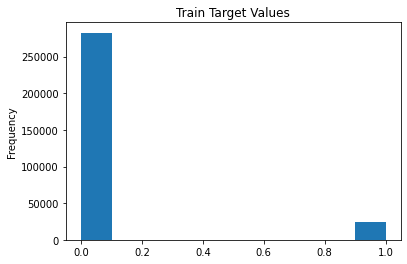

In [ ]:
datasets["application_train"]['TARGET'].astype(int).plot.hist(title="Train Target Values")

Our Data IS heavily unbalanced. It is very hard to trace relations between the data.



### Lets see the correlations

In [ ]:
correl = datasets["application_train"].corr()['TARGET'].sort_values()
print('10 Most +ve Correlations:\n', correl.tail(10))
print('\n10 Most -ve Correlations:\n', correl.head(10))

10 Most +ve Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

10 Most -ve Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


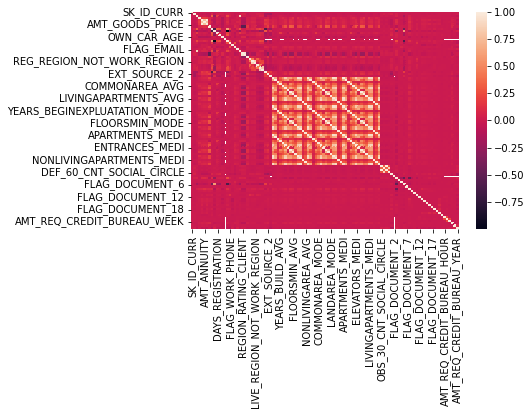

In [ ]:
import seaborn as sns
sns.heatmap(datasets['application_train'].corr()); 

### Let's segerate numerical and categorical features and analyse
The list was created after looking at the data type of the data set.

In [ ]:
allCatFeatures = [
  "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "NAME_TYPE_SUITE",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
  "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
  "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
  "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
  "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
  "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
  "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
  "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
  "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
  "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21",
  "HOUR_APPR_PROCESS_START"
]
allNumFeatures = [
  "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "REGION_POPULATION_RELATIVE",
  "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "OWN_CAR_AGE", "CNT_FAM_MEMBERS",
  "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "AMT_GOODS_PRICE",
  "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG",
  "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
  "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
  "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE",
  "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE",
  "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE",
  "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
  "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI",
  "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
  "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE", "OBS_30_CNT_SOCIAL_CIRCLE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
  "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
  "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT",
  "AMT_REQ_CREDIT_BUREAU_YEAR", "DAYS_ID_PUBLISH",
]

### Analysis of categorical features
Let's check if there's an appealing relationship between category and goals. The following graph depicts a percentage rather than an absolute value. This makes the percentage difference, rather than the absolute difference, simple to notice.

Between Most Correlated features.

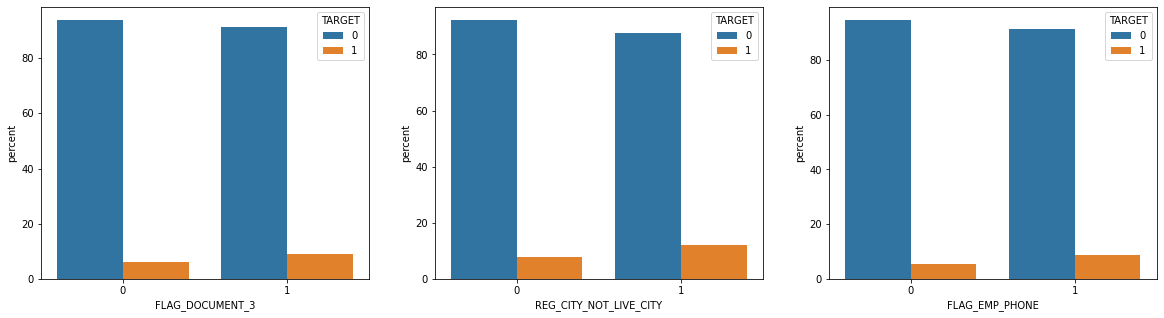

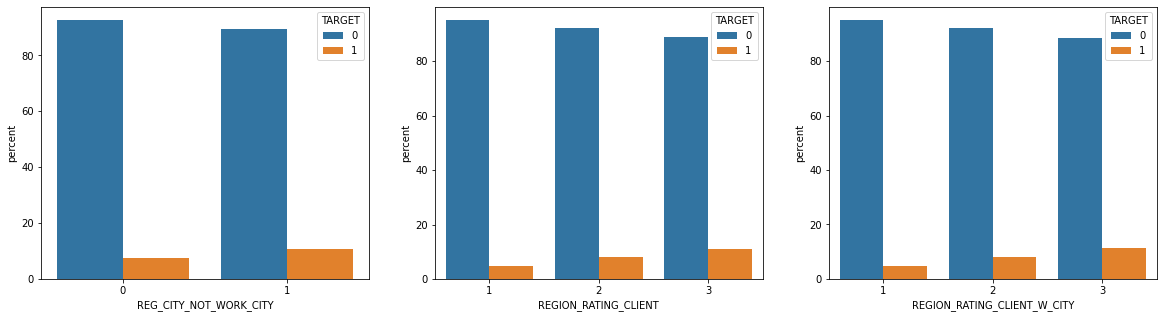

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

catCorr1 = [
  "FLAG_DOCUMENT_3", "REG_CITY_NOT_LIVE_CITY", "FLAG_EMP_PHONE",
]

catCorr2 = [
  "REG_CITY_NOT_WORK_CITY", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
]

app_train_df = datasets['application_train']
fig = plt.figure(figsize=(20,5))
for idx, cat in enumerate(catCorr1):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("13{}".format(idx+1)))
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

fig = plt.figure(figsize=(20,5))
for idx, cat in enumerate(catCorr2):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("13{}".format(idx+1)))
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

The interesting and most obvious splits here seem to be REGION_RATING_CLIENT and REG_CITY_NOT_WORK_CITY. In on our most correlated fields there is nothing much for us to infer.

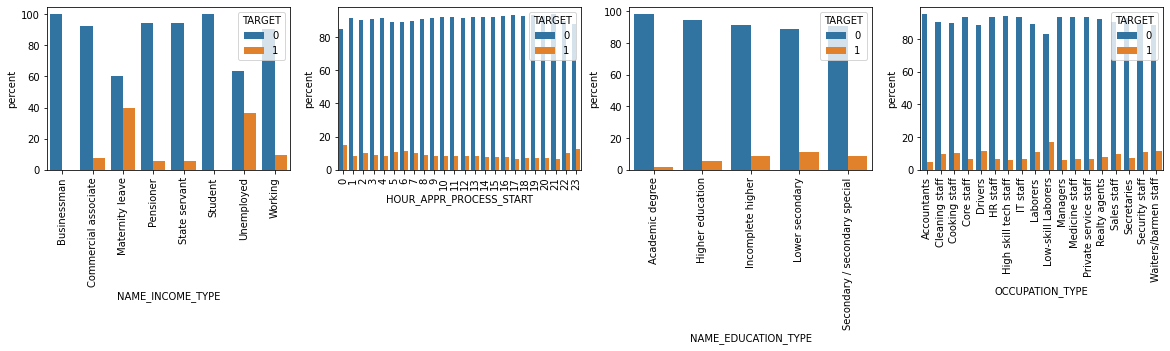

In [ ]:
cat_corr_features_i = [
  "NAME_INCOME_TYPE", "HOUR_APPR_PROCESS_START", "NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"
]

app_train_df = datasets['application_train']
fig = plt.figure(figsize=(20,3))
for idx, cat in enumerate(cat_corr_features_i):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("14{}".format(idx+1)))
  plt.xticks(rotation=90)
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

### Observations:

- According to `NAME_INCOME_TYPE`, Businessmen and Students almost never have problems with repayment,but those on maternity leave or unemployed are more likely to have difficulty in repaying the loan.

- According to `HOUR_APPR_PROCESS_START`, Those that file late or early in the day have more difficulty repaying. This pattern decreases over the afternoon, but resumes after 11 p.m. There appears to be a substantial drop about 6 p.m., which could be due to persons who work a 9-5 starting their application after work hours.

- `NAME_EDUCATION_TYPE` also shows some clear trends. The more educated a borrower is, the more difficult it is expected for them to repay the debt. 

- This is interesting, as according to `NAME_INCOME_TYPE`, Students almost never have problem repaying.

- `OCCUPATION_TYPE` shows some trends. Low-skill laborers are the most likely to experience repayment issues, while Accountants are the least likely. Drivers, laborers, and waiters/bartenders have a higher rate of default than the general population.

### Missing Values.

In [ ]:
df = datasets['application_train'][allCatFeatures]
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data.head(8)

,Percent,Missing Count
FONDKAPREMONT_MODE,68.39,210295
WALLSMATERIAL_MODE,50.84,156341
HOUSETYPE_MODE,50.18,154297
EMERGENCYSTATE_MODE,47.40,145755
OCCUPATION_TYPE,31.35,96391
NAME_TYPE_SUITE,0.42,1292
FLAG_DOCUMENT_10,0.00,0
FLAG_DOCUMENT_2,0.00,0


Only a few features are lacking, and except for OCCUPATION TYPE, none of them appear to be really interesting. This is most likely why, considering unemployment was not reported.

### Analysis of Numerical Features

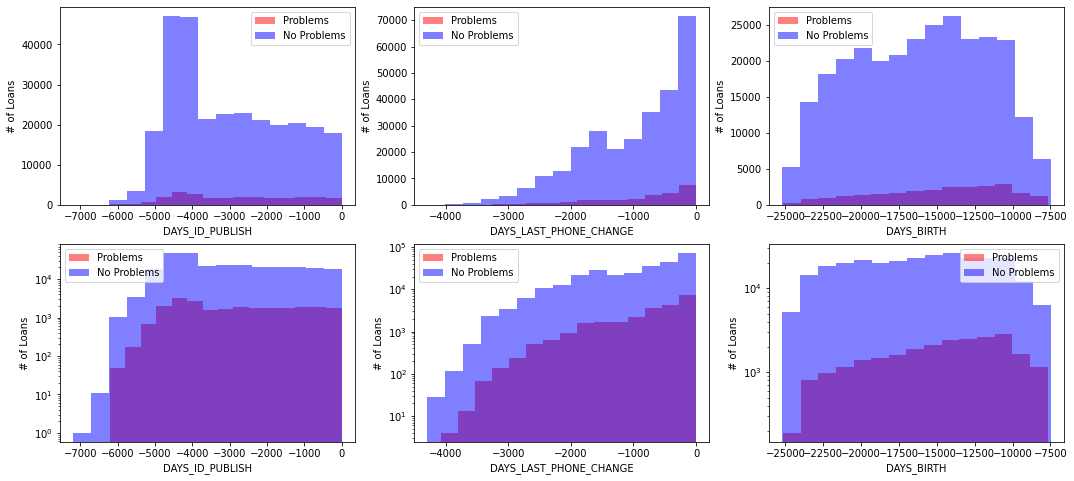

In [ ]:
def target_hist(y, ax, log=False):
  if log: ax.set_yscale('log')
  df = datasets['application_train']

  ax.hist(df[df["TARGET"]==1][y], bins=15, alpha=0.5, color="red", label="Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=15, alpha=0.5, color="blue", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("# of Loans")
  ax.legend()

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("DAYS_ID_PUBLISH", axs[0,0])
target_hist("DAYS_LAST_PHONE_CHANGE", axs[0,1])
target_hist("DAYS_BIRTH", axs[0,2])
# log graphs
target_hist("DAYS_ID_PUBLISH", axs[1,0], True)
target_hist("DAYS_LAST_PHONE_CHANGE", axs[1,1], True)
target_hist("DAYS_BIRTH", axs[1,2], True)

NOTE: For three separate features, these are the linear and log graphs. The log graph is located just beneath the linear graph and is used to aid in the reading and interpretation of data. 

There are several intriguing characteristics to be found here. It appears that the more recently a customer replaced their phone, the more probable there will be payback issues. 

The client's age has some unique characteristics as well. When the client is roughly 11,000 days old, or around 30 years old, the main difficulties appear to occur. The more capable they are of repaying the loan, the older or younger they are.

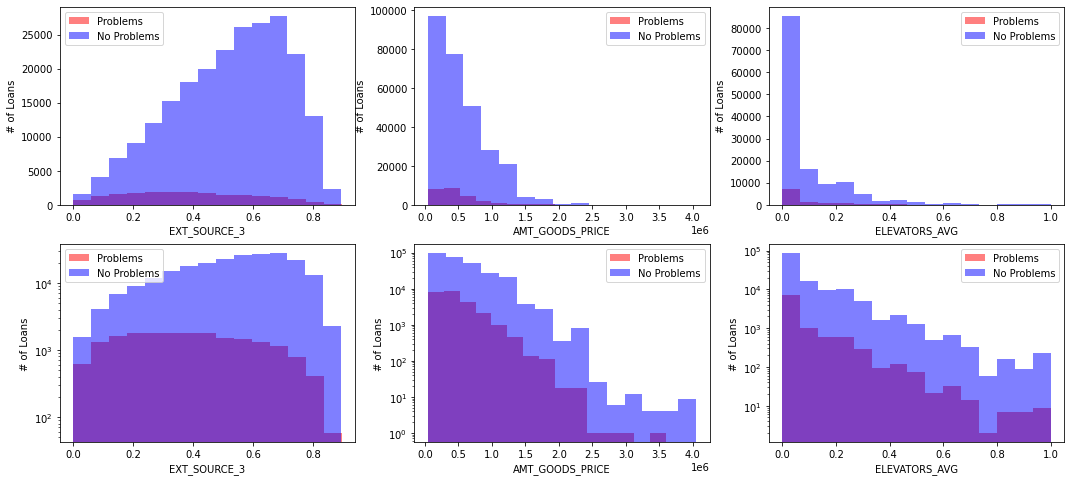

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("EXT_SOURCE_3", axs[0,0])
target_hist("AMT_GOODS_PRICE", axs[0,1])
target_hist("ELEVATORS_AVG", axs[0,2])
# log
target_hist("EXT_SOURCE_3", axs[1,0], True)
target_hist("AMT_GOODS_PRICE", axs[1,1], True)
target_hist("ELEVATORS_AVG", axs[1,2], True)

- The data field 'EXT SOURCE 3' has the strongest negative correlation. It's data from an external source with no specific labels, so drawing intuitive connections isn't really fascinating. 

- 'AMT GOODS PRICE' is strongly associated with repayment issues. Although the description is ambiguous, it's possible that this relates to the loan's collateral. 

- Interestingly, the more elevators in the building where the client lives, the more likely they are to have trouble repaying the loan, according to 'ELEVATORS AVG'. The target is also substantially connected with the number of floors, indicating that it is most likely related to rent pricing or neighborhood quality.

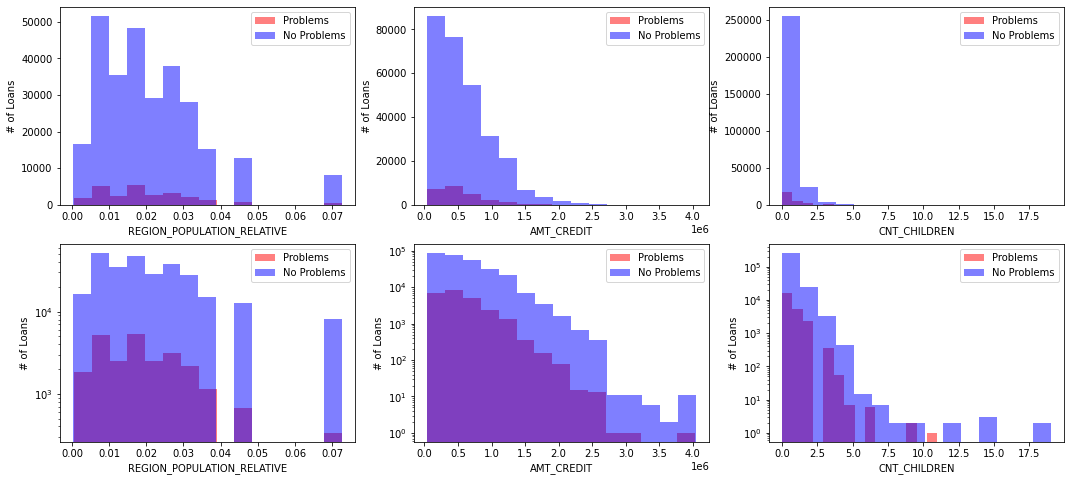

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("REGION_POPULATION_RELATIVE", axs[0,0])
target_hist("AMT_CREDIT", axs[0,1])
target_hist("CNT_CHILDREN", axs[0,2])
# log graphs
target_hist("REGION_POPULATION_RELATIVE", axs[1,0], True)
target_hist("AMT_CREDIT", axs[1,1], True)
target_hist("CNT_CHILDREN", axs[1,2], True)

- The larger the population in which the customer lives, the better he seems to be able to repay the loan. This may be because it is more expensive to live in a populated area. 
 
- You can see that the more people you want to borrow, the less repayment problems you have. 
 
- The more children a customer has, the harder it is  to repay the loan without problems.

### Missing Values

In [ ]:
df = datasets['application_train'][allNumFeatures]
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data.head(54)

,Percent,Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_MODE,69.43,213514
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
FLOORSMIN_MEDI,67.85,208642


- Unfortunately, more than half of the data lacks many interesting features. Ideally, you want to avoid relying on this data. 
 
- `EXT_SOURCE_1`, like the  information about the floor of the customer's house, is highly correlated with the destination, but is missing in about half of the rows, so this type of data can be heavily biased.

- `EXT_SOURCE_3` is also missing about 20% of the lines, which is bad for analysis.

## Analyse Secondary Datasets

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# some generalized functions to make the analysis easy on us
def cat_bar(df, x, ax):
  df2 = df.groupby(x)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  sns.barplot(x=x,y='percent',hue='TARGET',data=df2,ax=ax)

def num_hist(df, y, ax, log=False):
  if log: ax.set_yscale('log')

  ax.hist(df[df["TARGET"]==1][y], bins=25, alpha=0.5, color="red", label="Had Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=25, alpha=0.5, color="green", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("No. of Loans")
  ax.legend()

def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

- For every other dataset, we groupped the data by SK_ID_CURR and performed some aggr fucntions and then merged onto the application train data.

- Also, analysed the dataset for the trends or insights.

- The process for repeated for all the secondary datasets.

## Credit Card Balances

This dataset is month-to-month credit card balances, with one row being one month

In [ ]:
datasets['credit_card_balance'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
datasets['credit_card_balance'].info()
datasets['credit_card_balance'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [ ]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE":["mean"],
    "MONTHS_BALANCE": ["min"],
    "AMT_CREDIT_LIMIT_ACTUAL": ["max", "count"],
    "CNT_INSTALMENT_MATURE_CUM": ["max"],
    "AMT_PAYMENT_CURRENT": ["mean"]
})

CCB_df[("AMT_PAYMENT_CURRENT", "mean")].fillna(value=0, inplace=True)
CCB_df['Payment_balance_ratio'] = CCB_df[("AMT_PAYMENT_CURRENT", "mean")] / (CCB_df[("AMT_BALANCE", "mean")]+1)

In [ ]:
tmp = datasets['application_train'].merge(CCB_df, how='left', on='SK_ID_CURR')

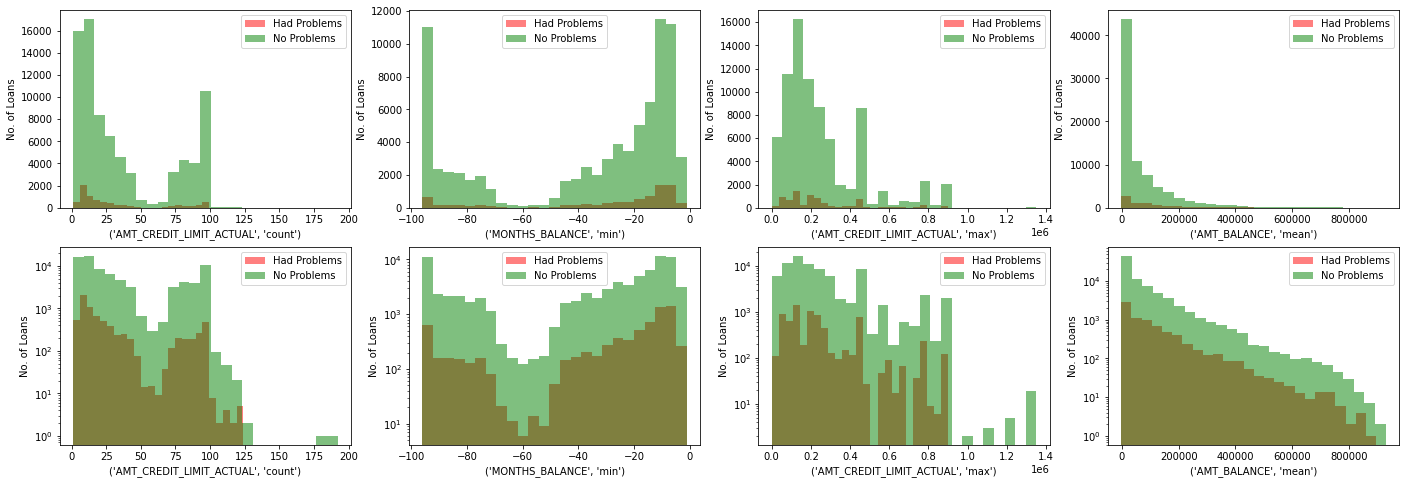

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(tmp, ('AMT_CREDIT_LIMIT_ACTUAL', 'count'), axs[0,0])
num_hist(tmp, ('MONTHS_BALANCE', 'min'), axs[0,1])
num_hist(tmp, ('AMT_CREDIT_LIMIT_ACTUAL', 'max'), axs[0,2])
num_hist(tmp, ('AMT_BALANCE', 'mean'), axs[0,3])
# log graphs
num_hist(tmp, ('AMT_CREDIT_LIMIT_ACTUAL', 'count'), axs[1,0], True)
num_hist(tmp, ('MONTHS_BALANCE', 'min'), axs[1,1], True)
num_hist(tmp, ('AMT_CREDIT_LIMIT_ACTUAL', 'max'), axs[1,2], True)
num_hist(tmp, ('AMT_BALANCE', 'mean'), axs[1,3], True)

- It appears that customers with the highest credit limits have very few refund issues, which is to be expected. The number of credit card equalizations appears to be in the shape of a "U". However, those few people who are in extremely high positions have no problem paying the advance.

- It's hard to say, but `AMT_BALANCE` may also have something to do with the target.

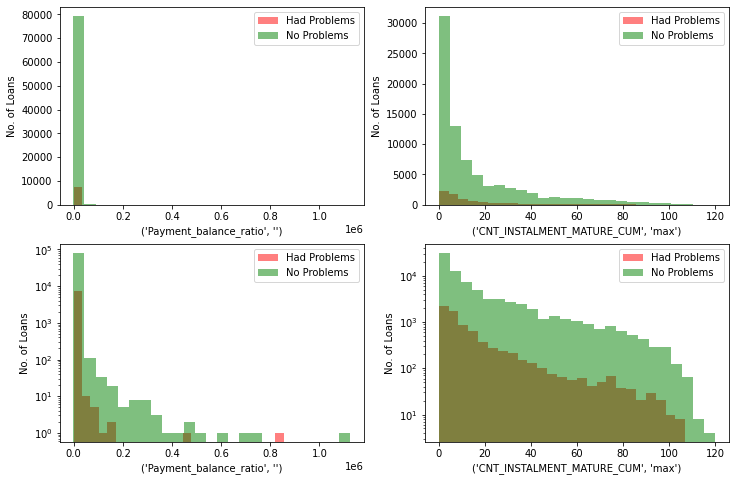

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
num_hist(tmp, ("Payment_balance_ratio", ''), axs[0,0])
num_hist(tmp, ('CNT_INSTALMENT_MATURE_CUM', 'max'), axs[0,1])
# log graphs
num_hist(tmp, ("Payment_balance_ratio", ''), axs[1,0], True)
num_hist(tmp, ('CNT_INSTALMENT_MATURE_CUM', 'max'), axs[1,1], True)

- The `Payment_balance_ratio` all seem to be concentrated around 0.0, so there is little predictive power. 

- `CNT_INSTALMENT_MATURE_CUM` seems to have a pretty good correlation. This makes sense. The more installments a client pays to a credit card, the less likely it is that the loan will have problems.

### Correlations

In [ ]:
tmp[list(CCB_df.columns) + ["TARGET"]].corr()["TARGET"]

(AMT_BALANCE, mean)                 0.087177
(MONTHS_BALANCE, min)               0.061359
(AMT_CREDIT_LIMIT_ACTUAL, max)     -0.011679
(AMT_CREDIT_LIMIT_ACTUAL, count)   -0.060481
(CNT_INSTALMENT_MATURE_CUM, max)   -0.017568
(AMT_PAYMENT_CURRENT, mean)         0.028224
(Payment_balance_ratio, )           0.000719
TARGET                              1.000000
Name: TARGET, dtype: float64

- These are some strong correlation values. `AMT_BALANCE` refers to your credit card balance. Therefore, it makes sense that the higher the balance, the harder it is to repay the loan. 

- Since the balance is `MONTHS_BALANCE`, the closer you are to the application time, the more difficult it will be to repay.

### Missing Values

In [ ]:
missing_vals(tmp[CCB_df.columns])

,Percent,Missing Count
"(AMT_BALANCE, mean)",71.74,220606
"(MONTHS_BALANCE, min)",71.74,220606
"(AMT_CREDIT_LIMIT_ACTUAL, max)",71.74,220606
"(AMT_CREDIT_LIMIT_ACTUAL, count)",71.74,220606
"(CNT_INSTALMENT_MATURE_CUM, max)",71.74,220606
"(AMT_PAYMENT_CURRENT, mean)",71.74,220606
"(Payment_balance_ratio, )",71.74,220606


### Previous Applications

In [ ]:
datasets['previous_application'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
datasets['previous_application'].info()
datasets['previous_application'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": ["mean", "count"],
    "NAME_CONTRACT_STATUS": "max",
    "NAME_CLIENT_TYPE": "max",
    "NAME_YIELD_GROUP": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
    "CNT_PAYMENT": "max",
})

In [ ]:
tmp = datasets['application_train'].merge(PA_df, how='left', on='SK_ID_CURR')

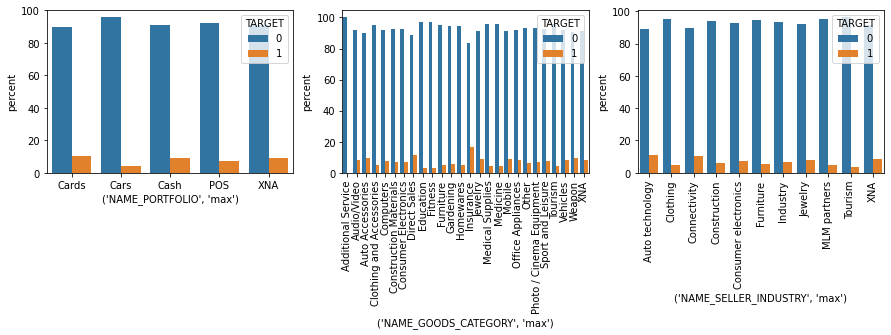

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cat_bar(tmp, ('NAME_PORTFOLIO', 'max'), axs[0])
cat_bar(tmp, ('NAME_GOODS_CATEGORY', 'max'), axs[1])
cat_bar(tmp, ('NAME_SELLER_INDUSTRY', 'max'), axs[2])

for tick in axs[1].get_xticklabels():
  tick.set_rotation(90)
for tick in axs[2].get_xticklabels():
  tick.set_rotation(90)

- The `NAME_GOODS_CATEGORY`, 'Education', 'Fitness', and 'Tourism' have the least amount of repayment problems, while 'Insurance', 'Direct Sales', and 'Weapon' have some of the highest rates of problems.

- `NAME_PRODUCT_TYPE`, walk-ins have higher rates of problems than the other two.

- `NAME_PORTFOLIO`, Car loans seem to have the least amount of problems

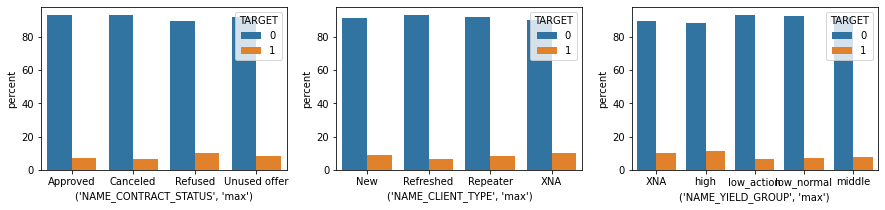

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cat_bar(tmp, ('NAME_CONTRACT_STATUS', 'max'), axs[0])
cat_bar(tmp, ('NAME_CLIENT_TYPE', 'max'), axs[1])
cat_bar(tmp, ('NAME_YIELD_GROUP', 'max'), axs[2])

- `NAME_CONTRACT_STATUS`, the Refused clients have a higher probability of having payment issues.

- `NAME_CLIENT_TYPE`, 'Refreshed' clients have a lower probability of having problems.

- `NAME_YIELD_GROUP`, the low-yield clients have the fewest amount of problems, and 'XNA' and 'high' yield groups have the most amount of problems.

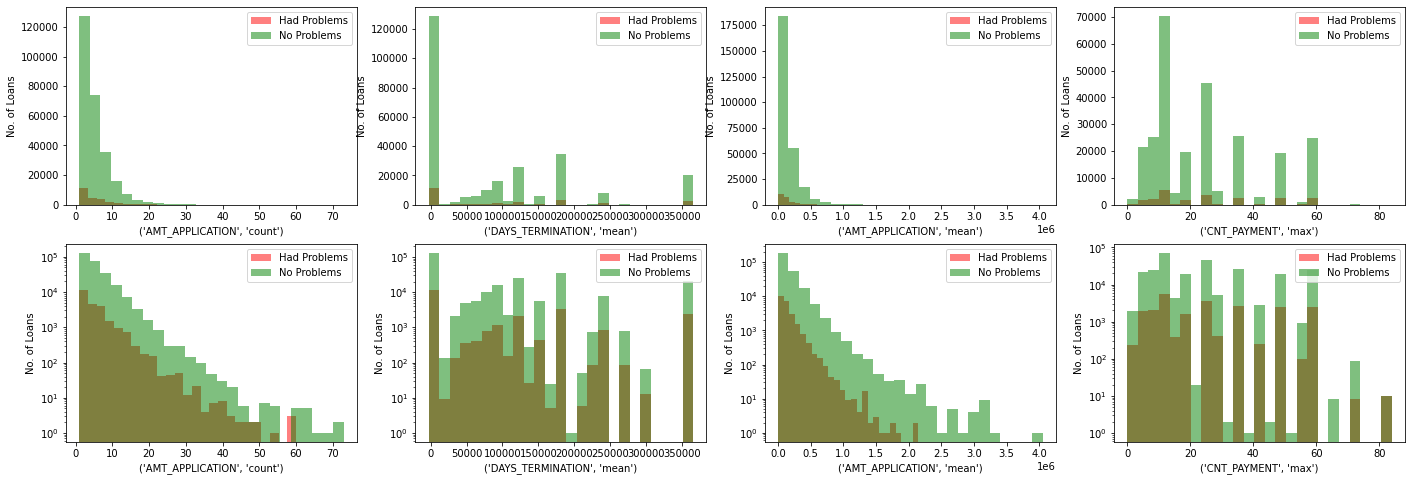

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(tmp, ('AMT_APPLICATION', 'count'), axs[0,0])
num_hist(tmp, ('DAYS_TERMINATION', 'mean'), axs[0,1])
num_hist(tmp, ('AMT_APPLICATION', 'mean'), axs[0,2])
num_hist(tmp, ('CNT_PAYMENT', 'max'), axs[0,3])
# log graphs
num_hist(tmp, ('AMT_APPLICATION', 'count'), axs[1,0], True)
num_hist(tmp, ('DAYS_TERMINATION', 'mean'), axs[1,1], True)
num_hist(tmp, ('AMT_APPLICATION', 'mean'), axs[1,2], True)
num_hist(tmp, ('CNT_PAYMENT', 'max'), axs[1,3], True)

It's hard to see, but clients with a large number of applications and demanding higher amounts tend to have more repayment issues.

### Correlations

In [ ]:
tmp[list(PA_df.columns) + ["TARGET"]].corr()["TARGET"]

(AMT_APPLICATION, mean)    -0.021803
(AMT_APPLICATION, count)    0.019762
(DAYS_TERMINATION, mean)    0.025795
(CNT_PAYMENT, max)          0.029439
TARGET                      1.000000
Name: TARGET, dtype: float64

### Missing Values

In [ ]:
missing_vals(tmp[PA_df.columns])

,Percent,Missing Count
"(DAYS_TERMINATION, mean)",5.77,17751
"(CNT_PAYMENT, max)",5.49,16869
"(AMT_APPLICATION, mean)",5.35,16454
"(AMT_APPLICATION, count)",5.35,16454
"(NAME_CONTRACT_STATUS, max)",5.35,16454
"(NAME_CLIENT_TYPE, max)",5.35,16454
"(NAME_YIELD_GROUP, max)",5.35,16454
"(NAME_PORTFOLIO, max)",5.35,16454
"(NAME_GOODS_CATEGORY, max)",5.35,16454
"(NAME_SELLER_INDUSTRY, max)",5.35,16454


There's not a lot of missing data here.

## Pos Cash Balance

In [ ]:
datasets['POS_CASH_balance'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": ["count"],
    "CNT_INSTALMENT_FUTURE":["max", "min", "mean"],
    "MONTHS_BALANCE":["max","min", "mean"],

})

In [ ]:
tmp = datasets['application_train'].merge(PCB_df, how='left', on='SK_ID_CURR')

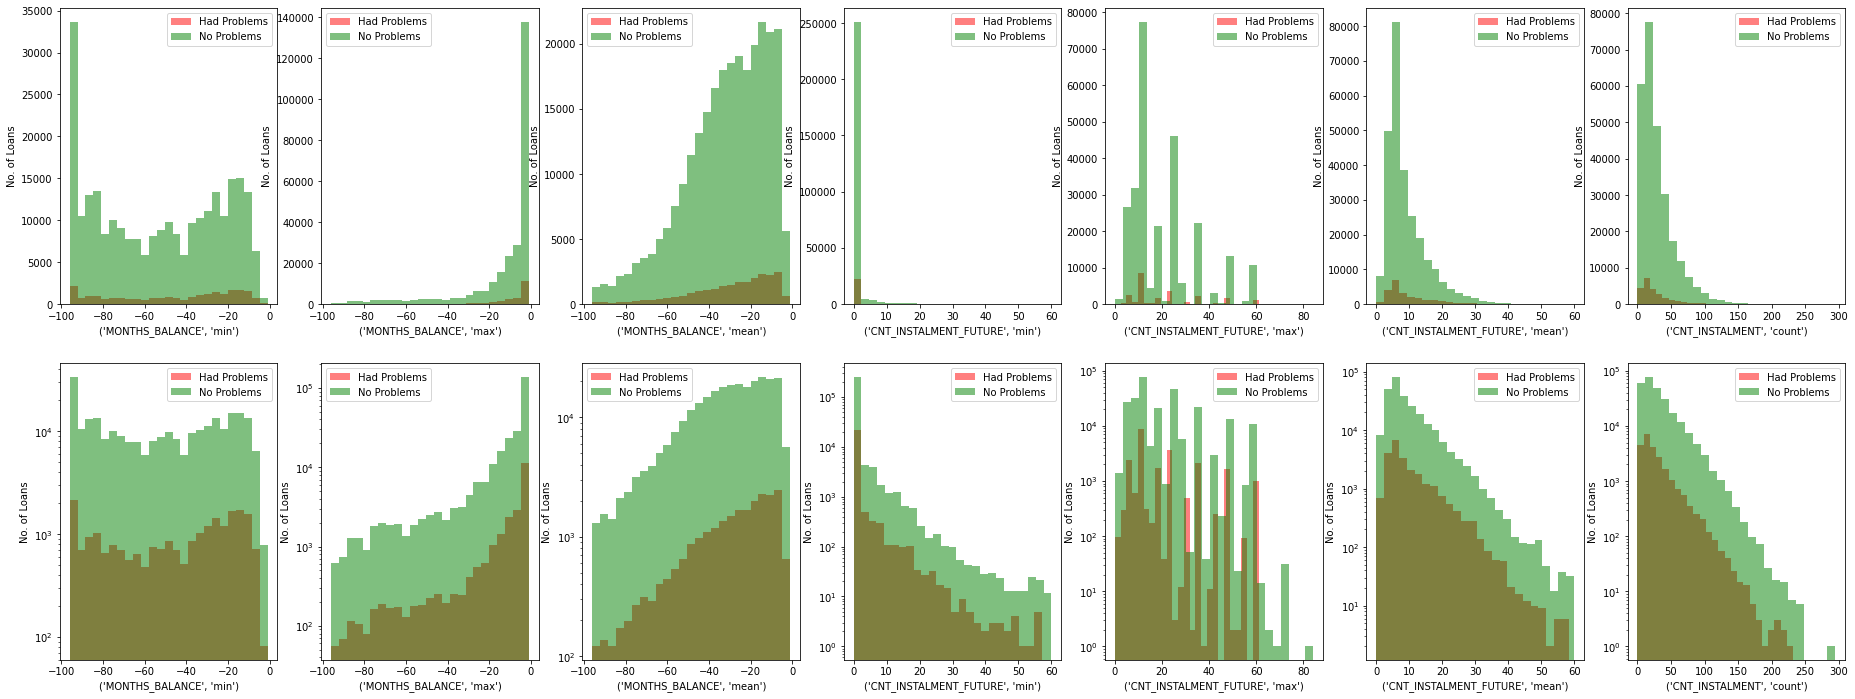

In [ ]:
fig, axs = plt.subplots(2, 7, figsize=(32, 12))
num_hist(tmp, ("MONTHS_BALANCE", 'min'), axs[0,0])
num_hist(tmp, ("MONTHS_BALANCE", 'max'), axs[0,1])
num_hist(tmp, ("MONTHS_BALANCE", 'mean'), axs[0,2])
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'min'), axs[0,3])
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'max'), axs[0,4])
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'mean'), axs[0,5])
num_hist(tmp, ('CNT_INSTALMENT', 'count'), axs[0,6])
# log graphs
num_hist(tmp, ("MONTHS_BALANCE", 'min'), axs[1,0], True)
num_hist(tmp, ("MONTHS_BALANCE", 'max'), axs[1,1], True)
num_hist(tmp, ("MONTHS_BALANCE", 'mean'), axs[1,2], True)
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'min'), axs[1,3], True)
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'max'), axs[1,4], True)
num_hist(tmp, ("CNT_INSTALMENT_FUTURE", 'mean'), axs[1,5], True)
num_hist(tmp, ('CNT_INSTALMENT', 'count'), axs[1,6], True)

- MONTHS_BALANCE, min are very vaguely "U" shaped, but the difference between problematic and problem-free is uniform throughout. CNT_INSTALMENT_FUTURE, max are very sporadic, but most of these graphs don't look like a difference in the problem and the problem doesn't change much.

### Correlations

In [ ]:
tmp[list(PCB_df.columns) + ["TARGET"]].corr()["TARGET"]

(CNT_INSTALMENT, count)         -0.035802
(CNT_INSTALMENT_FUTURE, max)     0.013324
(CNT_INSTALMENT_FUTURE, min)     0.019010
(CNT_INSTALMENT_FUTURE, mean)    0.027827
(MONTHS_BALANCE, max)           -0.004321
(MONTHS_BALANCE, min)            0.055307
(MONTHS_BALANCE, mean)           0.034543
TARGET                           1.000000
Name: TARGET, dtype: float64

- As we can see, the best feature from these is (MONTHS_BALANCE, min), though it is not as high of a correlation as in other datasets. 

### Missing Values

In [ ]:
missing_vals(tmp[PCB_df.columns])

,Percent,Missing Count
"(CNT_INSTALMENT_FUTURE, max)",5.88,18091
"(CNT_INSTALMENT_FUTURE, min)",5.88,18091
"(CNT_INSTALMENT_FUTURE, mean)",5.88,18091
"(CNT_INSTALMENT, count)",5.88,18067
"(MONTHS_BALANCE, max)",5.88,18067
"(MONTHS_BALANCE, min)",5.88,18067
"(MONTHS_BALANCE, mean)",5.88,18067


There are a relatively low amount of misssing values here.

## Installments Payments

In [ ]:
datasets['installments_payments'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:

datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "NUM_INSTALMENT_NUMBER":["max","min", "mean", "count"],
    "DAYS_INSTALMENT":["max","min", "mean"],
    "DAYS_ENTRY_PAYMENT":["max","min", "mean"],
    "AMT_INSTALMENT":["sum"],
    "AMT_PAYMENT":["sum"]
})
IP_df["SUM_MISSED"] = IP_df[("AMT_INSTALMENT", "sum")] - IP_df[("AMT_PAYMENT", "sum")]

In [ ]:
tmp = datasets['application_train'].merge(IP_df, how='left', on='SK_ID_CURR')

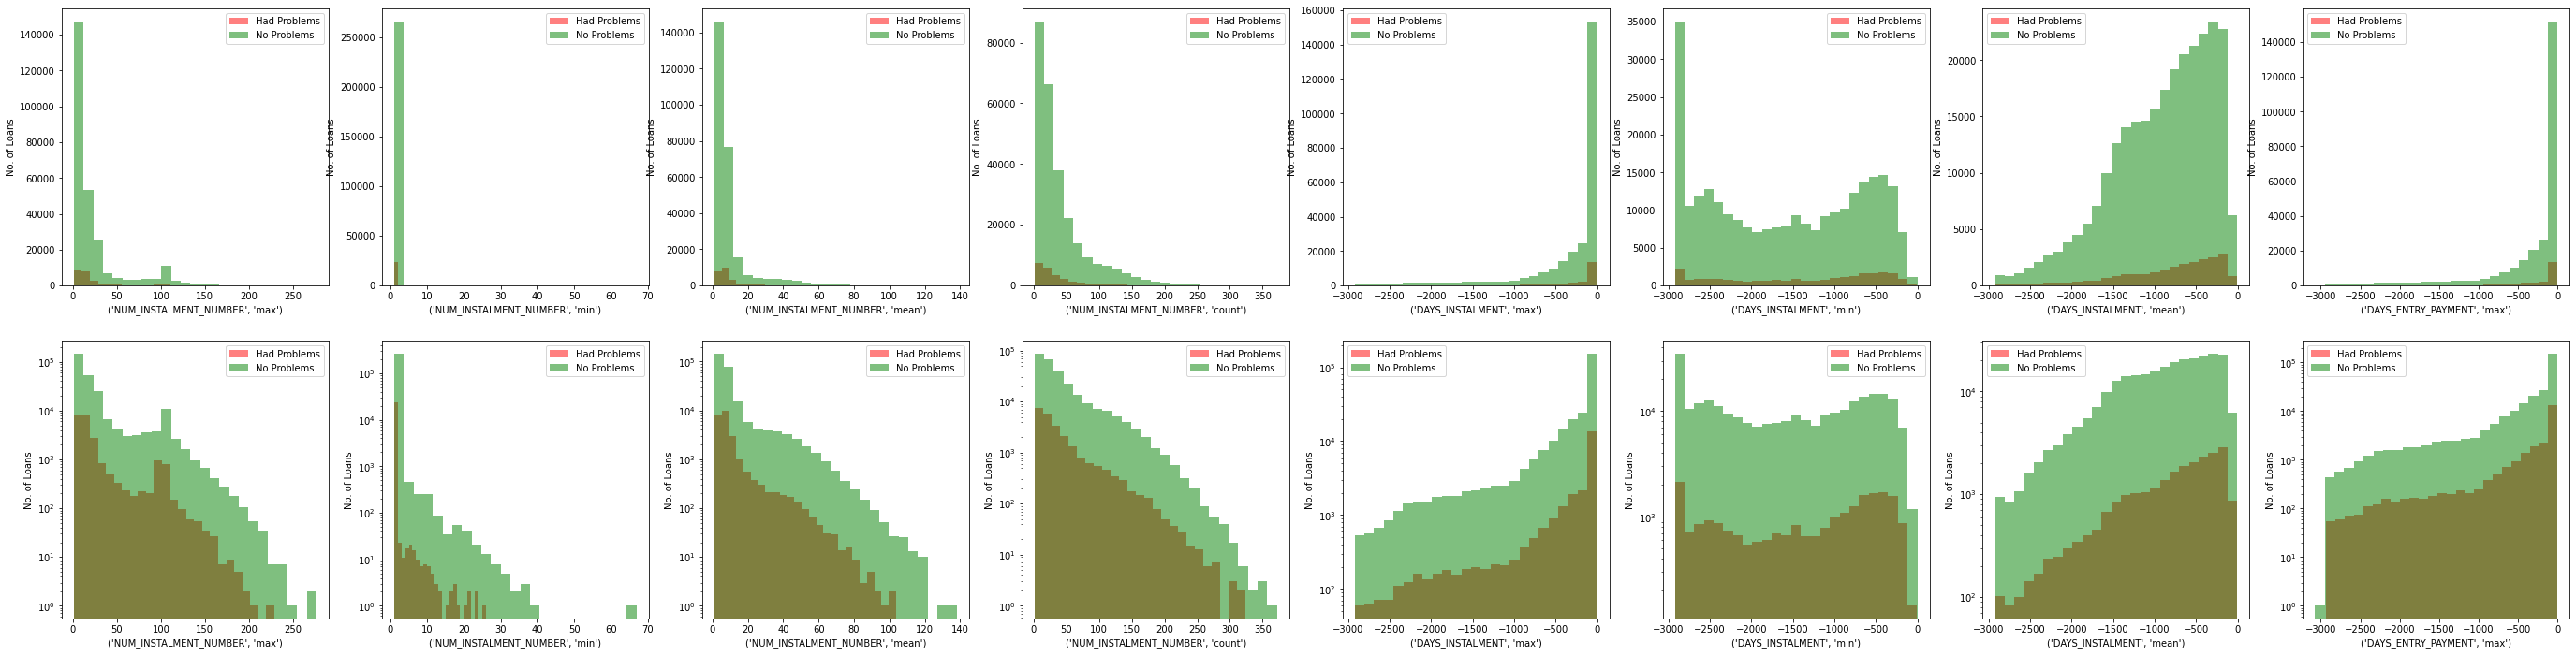

In [ ]:
fig, axs = plt.subplots(2, 8, figsize=(48,12))
for i in range(8):
  num_hist(tmp, IP_df.columns[i], axs[0,i])

# log graphs
for i in range(8):
  num_hist(tmp, IP_df.columns[i], axs[1,i], True)

None of these look very interesting. They all have uniform differences.

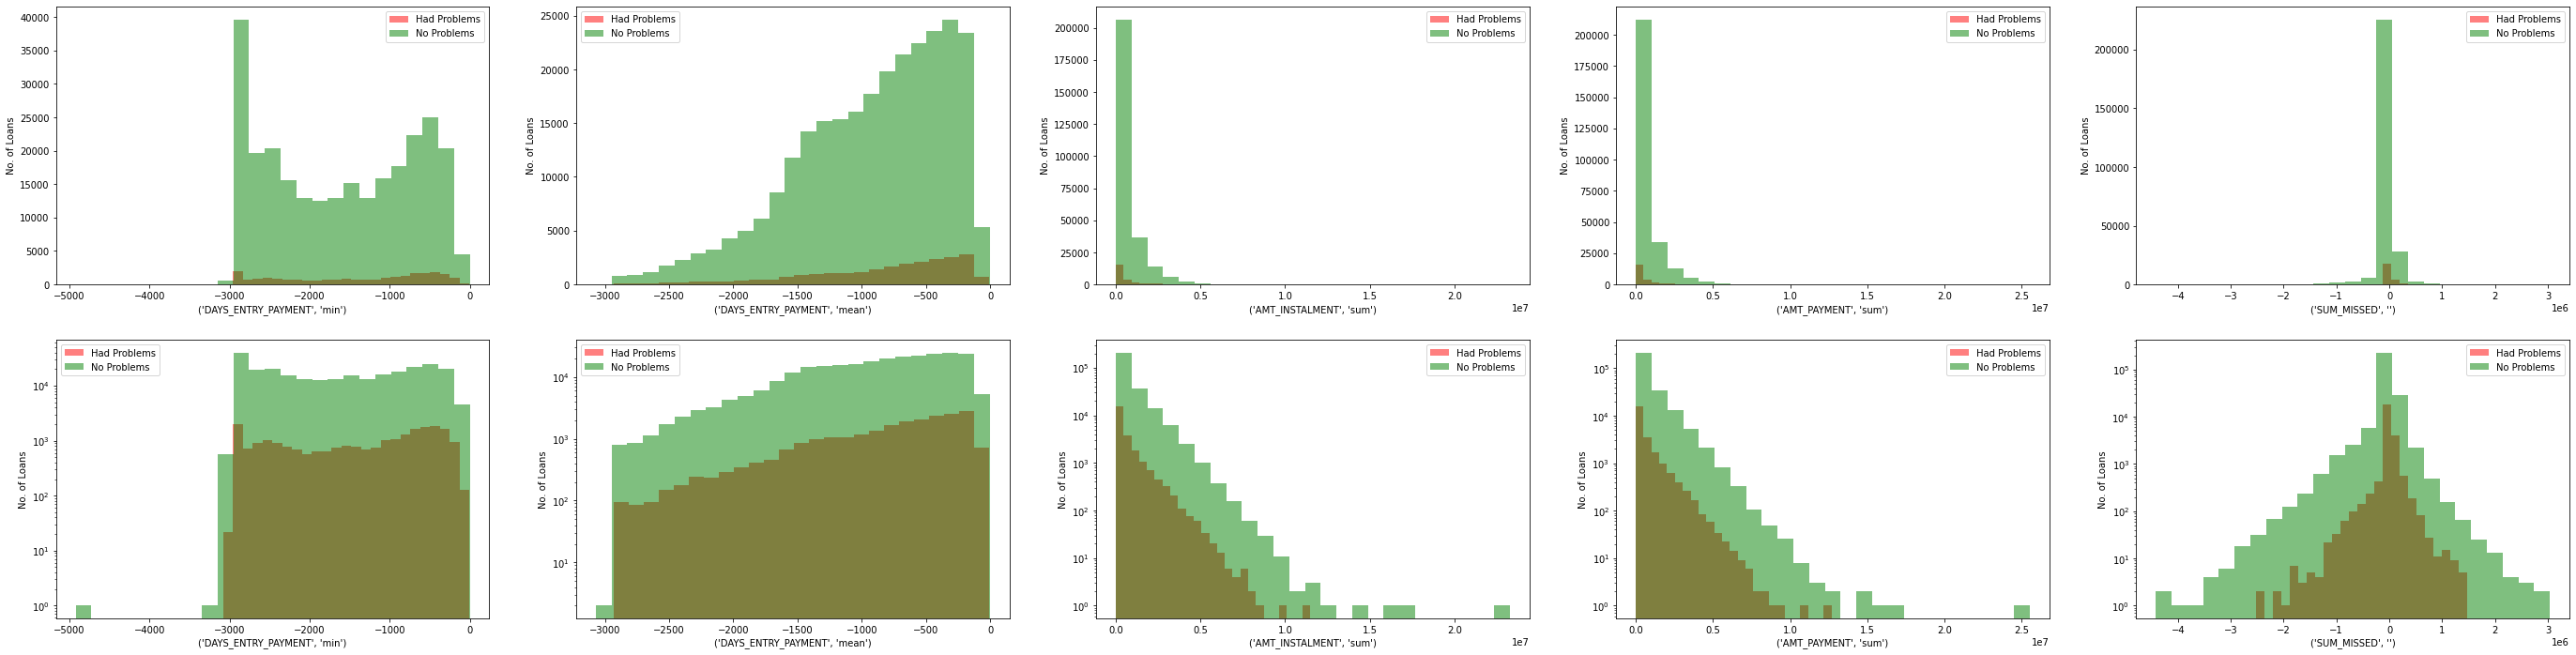

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(48,12))
for i in range(5):
  num_hist(tmp, IP_df.columns[8+i], axs[0,i])

# log graphs
for i in range(5):
  num_hist(tmp, IP_df.columns[8+i], axs[1,i], True)

These are also not very interesting.

In [ ]:
tmp[list(IP_df.columns) + ["TARGET"]].corr()["TARGET"]

(NUM_INSTALMENT_NUMBER, max)      0.006304
(NUM_INSTALMENT_NUMBER, min)     -0.002334
(NUM_INSTALMENT_NUMBER, mean)    -0.009537
(NUM_INSTALMENT_NUMBER, count)   -0.021096
(DAYS_INSTALMENT, max)           -0.003231
(DAYS_INSTALMENT, min)            0.058648
(DAYS_INSTALMENT, mean)           0.043509
(DAYS_ENTRY_PAYMENT, max)        -0.002298
(DAYS_ENTRY_PAYMENT, min)         0.058794
(DAYS_ENTRY_PAYMENT, mean)        0.043992
(AMT_INSTALMENT, sum)            -0.019811
(AMT_PAYMENT, sum)               -0.024375
(SUM_MISSED, )                    0.027932
TARGET                            1.000000
Name: TARGET, dtype: float64

### Missing Values

In [ ]:
missing_vals(tmp[IP_df.columns])

,Percent,Missing Count
"(DAYS_ENTRY_PAYMENT, max)",5.16,15876
"(DAYS_ENTRY_PAYMENT, min)",5.16,15876
"(DAYS_ENTRY_PAYMENT, mean)",5.16,15876
"(NUM_INSTALMENT_NUMBER, max)",5.16,15868
"(NUM_INSTALMENT_NUMBER, min)",5.16,15868
"(NUM_INSTALMENT_NUMBER, mean)",5.16,15868
"(NUM_INSTALMENT_NUMBER, count)",5.16,15868
"(DAYS_INSTALMENT, max)",5.16,15868
"(DAYS_INSTALMENT, min)",5.16,15868
"(DAYS_INSTALMENT, mean)",5.16,15868


These all have relatively low missing counts, so the correlation is probably fairly accurate.

## Bureau

In [ ]:
datasets['bureau'].columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [ ]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE":["max", "min"],
    "CREDIT_ACTIVE":["count", "max", "min"],
    "DAYS_CREDIT":["max", "min", "mean"],
    "CREDIT_DAY_OVERDUE":["max"],
    "AMT_CREDIT_SUM":["max"],
    "AMT_CREDIT_SUM_OVERDUE":["max"],
})

In [ ]:
tmp = datasets['application_train'].merge(B_df, how='left', on='SK_ID_CURR')

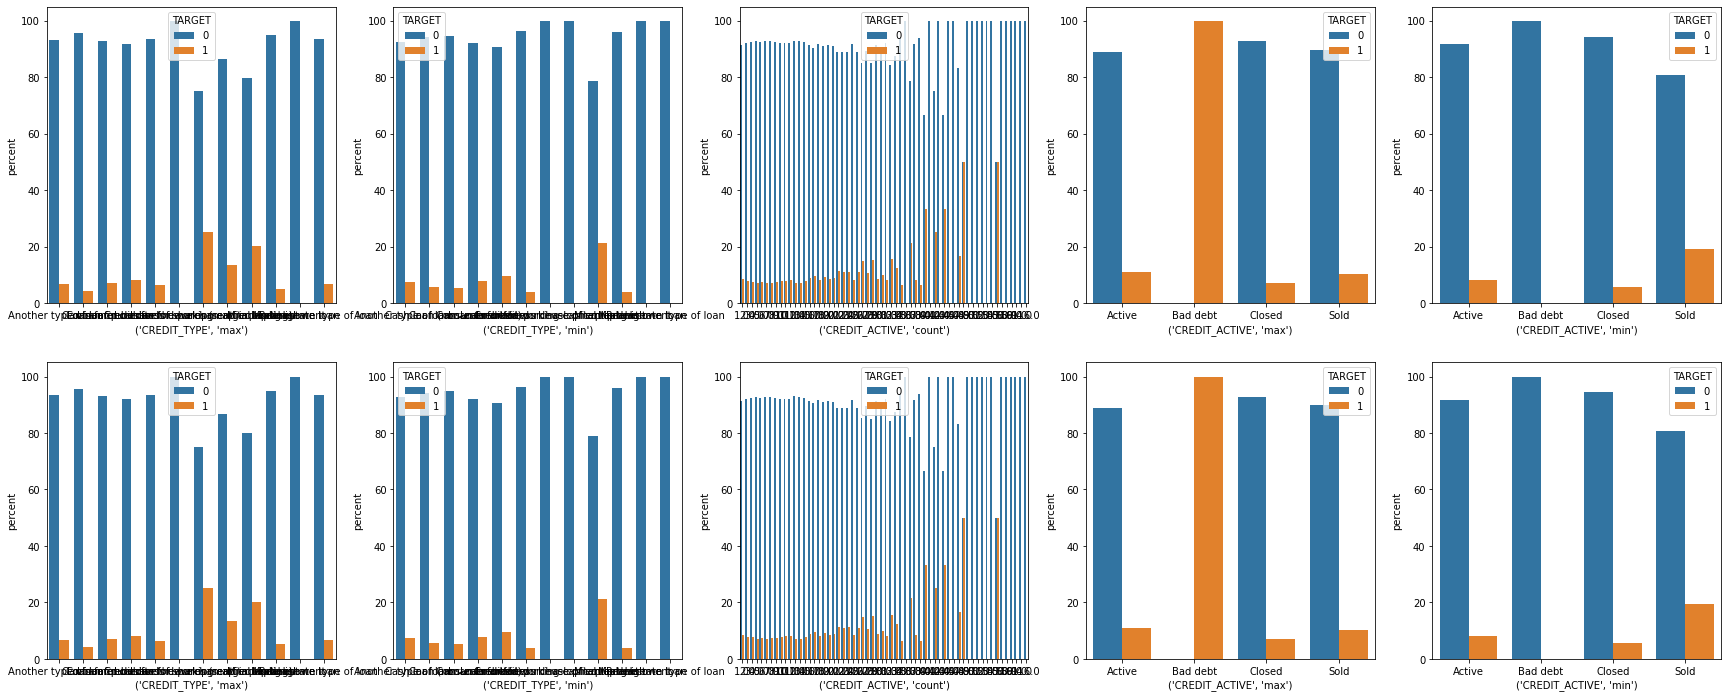

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(5):
  if B_df.columns[i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(tmp, B_df.columns[i], axs[0,i])
  else:
    num_hist(tmp, B_df.columns[i], axs[0,i])

# log graphs
for i in range(5):
  if B_df.columns[i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(tmp, B_df.columns[i], axs[1,i])
  else:
    num_hist(tmp, B_df.columns[i], axs[1,i], True)

- All days_credit and credit_type graphs look pretty promising, as some of the graphs show that they are more likely to have problems than other graphs.

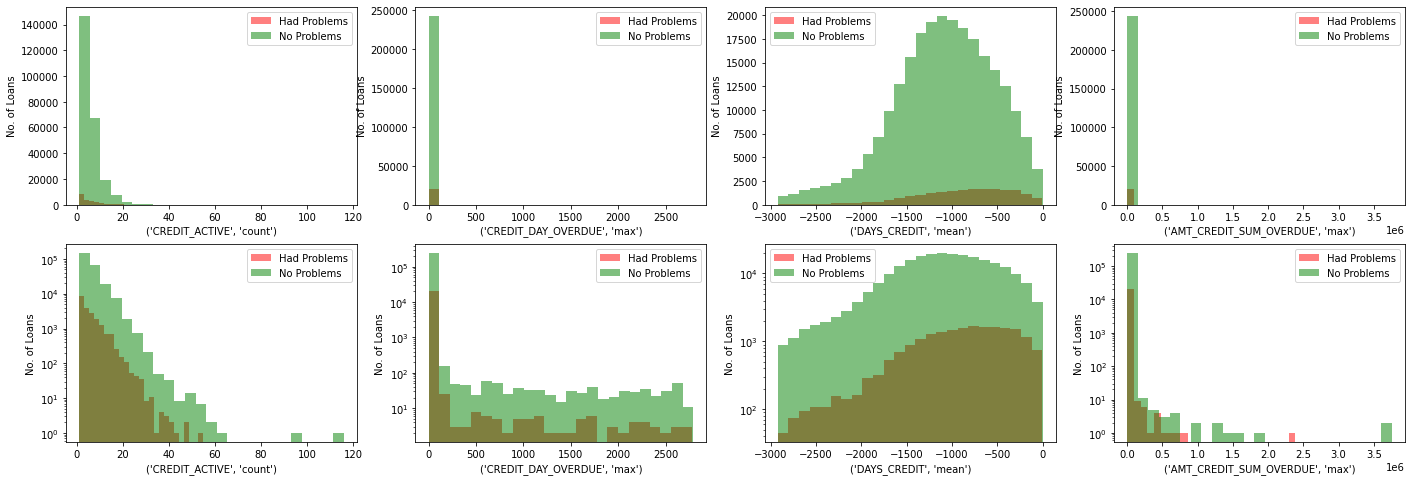

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(tmp, ('CREDIT_ACTIVE', 'count'), axs[0,0])
num_hist(tmp, ('CREDIT_DAY_OVERDUE', 'max'), axs[0,1])
num_hist(tmp, ('DAYS_CREDIT', 'mean'), axs[0,2])
num_hist(tmp, ('AMT_CREDIT_SUM_OVERDUE', 'max'), axs[0,3])
# log graphs
num_hist(tmp, ('CREDIT_ACTIVE', 'count'), axs[1,0], True)
num_hist(tmp, ('CREDIT_DAY_OVERDUE', 'max'), axs[1,1], True)
num_hist(tmp, ('DAYS_CREDIT', 'mean'), axs[1,2], True)
num_hist(tmp, ('AMT_CREDIT_SUM_OVERDUE', 'max'), axs[1,3], True)

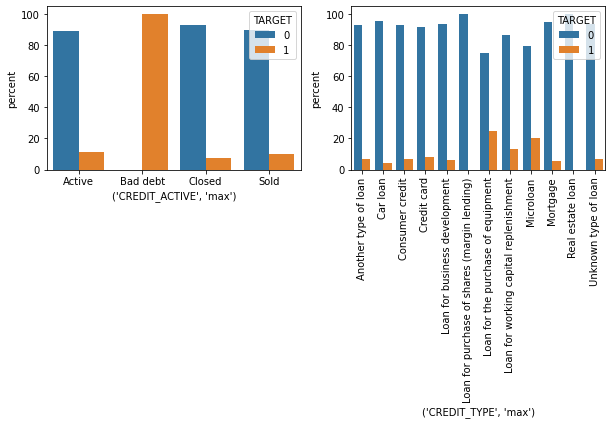

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
cat_bar(tmp, ('CREDIT_ACTIVE', 'max'), axs[0])
plt.xticks(rotation=90)
cat_bar(tmp, ('CREDIT_TYPE', 'max'), axs[1])

- There are some clear trends here. In "CREDIT_ACTIVE", the "CLOSED" part had fewer problems than the other groups. Also, everyone in the "bad debt" group had problems. 
 
- In `CREDIT_TYPE`, the customer who used his loan to buy shares or real estate had no problems with repayment, while those who used it for equipment, or "working capital replenishment" ', or the small loans they all had bigger problems with repaying. 

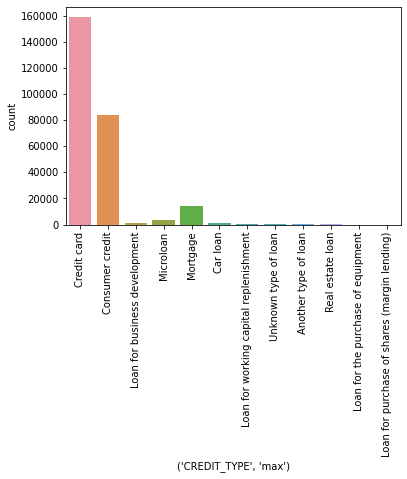

In [ ]:
plt.xticks(rotation=90)
sns.countplot(tmp['CREDIT_TYPE', 'max'])

In [ ]:
len(tmp.loc[tmp[('CREDIT_ACTIVE', 'max')] == 'Bad debt'])

1


- In `CREDIT_TYPE`, except for the 4th most popular category," Microloan ", it seems that the groups we were interested in didn't have many samples, but there are significant differences. The most popular type of loan is the "credit card", which is significantly more difficult than the second and third most popular types "consumer credit" and "mortgage" respectively. This feature is probably still interesting. 

- Turn these into "credit card", "consumer credit", "mortgage", "other difficult", "other", "other difficult" You may be able to group them. Includes microloans, etc., where the client had a significant difficulty in repayment of the loan

### Correlations

In [ ]:
tmp[list(B_df.columns) + ["TARGET"]].corr()["TARGET"]

(CREDIT_ACTIVE, count)           0.004056
(DAYS_CREDIT, max)               0.049782
(DAYS_CREDIT, min)               0.075248
(DAYS_CREDIT, mean)              0.089729
(CREDIT_DAY_OVERDUE, max)        0.005493
(AMT_CREDIT_SUM, max)           -0.019737
(AMT_CREDIT_SUM_OVERDUE, max)    0.010614
TARGET                           1.000000
Name: TARGET, dtype: float64

As we can see from the correlations, `DAYS_CREDIT` is quite significant. 

### Missing Values

In [ ]:
missing_vals(tmp[B_df.columns])

,Percent,Missing Count
"(AMT_CREDIT_SUM, max)",14.32,44021
"(CREDIT_TYPE, max)",14.31,44020
"(CREDIT_TYPE, min)",14.31,44020
"(CREDIT_ACTIVE, count)",14.31,44020
"(CREDIT_ACTIVE, max)",14.31,44020
"(CREDIT_ACTIVE, min)",14.31,44020
"(DAYS_CREDIT, max)",14.31,44020
"(DAYS_CREDIT, min)",14.31,44020
"(DAYS_CREDIT, mean)",14.31,44020
"(CREDIT_DAY_OVERDUE, max)",14.31,44020


There's a decent amount of data missing, but since we have ~85% of the data, it should still perform pretty well for most data

## Other Datasets




These are all of the aggregate datasets we want to get from each secondary file. 




In [ ]:
new_cat_features = [("CREDIT_ACTIVE", "max"), ("NAME_CONTRACT_STATUS", "max"), ("NAME_CLIENT_TYPE", "max"), ("NAME_YIELD_GROUP", "max")]
new_num_features = [("AMT_APPLICATION", "sum"), ("AMT_APPLICATION", "count"), ("CNT_INSTALLMENT_FUTURE", "max"), ("CNT_INSTALMENT", "count"), ("MONTHS_BALANCE", "max"), ("MONTHS_BALANCE", "mean"), ("AMT_CREDIT_LIMIT_ACTUAL", "max"), ("AMT_CREDIT_LIMIT_ACTUAL", "count"), ("AMT_BALANCE", "mean"), ("NUM_INSTALMENT_NUMBER", "max"), ("NUM_INSTALMENT_NUMBER", "count"), ("DAYS_INSTALMENT", "max"), ("DAYS_ENTRY_PAYMENT", "max"), ("CREDIT_ACTIVE", "count"), ("DAYS_CREDIT", "min"), ("CREDIT_DAYS_OVERDUE", "max"), ("AMT_CREDIT_SUM", "max"), ("AMT_CREDIT_SUM_OVERDUE", "max")]

## Combine Secondaries Into Application




In [ ]:
train = datasets['application_train'].merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')

test = datasets['application_test'].merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')

In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(CREDIT_TYPE, min)","(CREDIT_ACTIVE, count)","(CREDIT_ACTIVE, max)","(CREDIT_ACTIVE, min)","(DAYS_CREDIT, max)","(DAYS_CREDIT, min)","(DAYS_CREDIT, mean)","(CREDIT_DAY_OVERDUE, max)","(AMT_CREDIT_SUM, max)","(AMT_CREDIT_SUM_OVERDUE, max)"
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Consumer credit,8.0,Closed,Active,-103.0,-1437.0,-874.000000,0.0,450000.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer credit,4.0,Closed,Active,-606.0,-2586.0,-1400.750000,0.0,810000.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Consumer credit,2.0,Closed,Closed,-408.0,-1326.0,-867.000000,0.0,94537.8,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Consumer credit,1.0,Closed,Closed,-1149.0,-1149.0,-1149.000000,0.0,146250.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Consumer credit,4.0,Closed,Active,-713.0,-919.0,-867.500000,0.0,2250000.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Consumer credit,1.0,Closed,Closed,-1104.0,-1104.0,-1104.000000,0.0,45000.0,0.0


In [ ]:
correl = train.corr()['TARGET'].sort_values()
print('10 Most +ve Correlations:\n', correl.tail(10))
print('\n10 Most -ve Correlations:\n', correl.head(10))

10 Most +ve Correlations:
 (DAYS_INSTALMENT, min)         0.058648
(DAYS_ENTRY_PAYMENT, min)      0.058794
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
(MONTHS_BALANCE, min)          0.061359
(DAYS_CREDIT, min)             0.075248
DAYS_BIRTH                     0.078239
(AMT_BALANCE, mean)            0.087177
(DAYS_CREDIT, mean)            0.089729
TARGET                         1.000000
Name: TARGET, dtype: float64

10 Most -ve Correlations:
 EXT_SOURCE_3                       -0.178919
EXT_SOURCE_2                       -0.160472
EXT_SOURCE_1                       -0.155317
(AMT_CREDIT_LIMIT_ACTUAL, count)   -0.060481
DAYS_EMPLOYED                      -0.044932
FLOORSMAX_AVG                      -0.044003
FLOORSMAX_MEDI                     -0.043768
FLOORSMAX_MODE                     -0.043226
AMT_GOODS_PRICE                    -0.039645
REGION_POPULATION_RELATIVE         -0.037227
Name: TARGET, dtype: float64


## BasePipeline with complete data

### Features Used

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
"EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
'REGION_RATING_CLIENT_W_CITY' ,     
'DAYS_BIRTH'    ,                
'DAYS_EMPLOYED',
]




### Pipeline

In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline1 = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('bayes',GaussianNB())
])

full_pipeline2 = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])






### FitPipeline

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline1.fit(X_train, y_train)
np.random.seed(42)

splits = ShuffleSplit(n_splits = 30, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline1, cv=splits.split(X_train))                

logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline1.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline1.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)

In [ ]:
# initialize results table
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])

In [ ]:
results.loc[1] = ["Baseline Bayes w/ All Data", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "Untuned Bayes"]

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline2.fit(X_train, y_train)
np.random.seed(42)

splits = ShuffleSplit(n_splits = 30, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline2, cv=splits.split(X_train))                

logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline2.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline2.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)

In [ ]:
results.loc[2] = ["Baseline Linear reg w/ All Data", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "Untuned LogisticRegression"]

In [ ]:
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
1,Baseline Bayes w/ All Data,0.734758,0.919634,0.917,291.1163,0.3749,Untuned Bayes
2,Baseline Linear reg w/ All Data,0.734758,0.919634,0.917,326.3181,0.4088,Untuned LogisticRegression



# upgrade lightgbm
!pip install --upgrade lightgbm
!pip install --upgrade xgboost

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print("DataSet:",f'{name}')
    print(f"shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  
DATA_DIR = "home-credit-default-risk" 

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

DataSet: application_train
shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


DataSet: application_test
shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


DataSet: bureau
shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


DataSet: bureau_balance
shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


DataSet: credit_card_balance
shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWIN

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


DataSet: installments_payments
shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


DataSet: previous_application
shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  in

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


DataSet: POS_CASH_balance
shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

# New Application Features

To evaluate all possible ways of merging our application data to create new data, we take a brute-force approach. This consumes a large amount of RAM and cannot be repeated without clearing all of it. As a result, the code has been commented out and only specific samples have been chosen.

In [ ]:
all_num_features = [
  "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "REGION_POPULATION_RELATIVE",
  "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS",
  "EXT_SOURCE_2", "EXT_SOURCE_3","AMT_GOODS_PRICE", "OBS_30_CNT_SOCIAL_CIRCLE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
  "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
  "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT",
  "AMT_REQ_CREDIT_BUREAU_YEAR", "DAYS_ID_PUBLISH",
]

## Creating new features

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# # this is an example for addition. Due to memory constraints, we can only run
 # one operation (+,-,/,*) per run
for key1 in all_num_features:
    for key2 in all_num_features:
         if key1 != key2:
            test_df[key1+"+"+key2] = datasets["application_train"][key1] + datasets["application_train"][key2]
            corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(datasets["application_train"]['TARGET'])

test_df

,CNT_CHILDREN+AMT_INCOME_TOTAL,CNT_CHILDREN+AMT_CREDIT,CNT_CHILDREN+AMT_ANNUITY,CNT_CHILDREN+REGION_POPULATION_RELATIVE,CNT_CHILDREN+DAYS_BIRTH,CNT_CHILDREN+DAYS_EMPLOYED,CNT_CHILDREN+DAYS_REGISTRATION,CNT_CHILDREN+CNT_FAM_MEMBERS,CNT_CHILDREN+EXT_SOURCE_2,CNT_CHILDREN+EXT_SOURCE_3,...,DAYS_ID_PUBLISH+DEF_30_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+OBS_60_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+DEF_60_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_DAY,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_MON,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_QRT,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,1.0,0.262949,0.139376,...,-2118.0,-2118.0,-2118.0,-3254.0,-2120.0,-2120.0,-2120.0,-2120.0,-2120.0,-2119.0
1,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,2.0,0.622246,NaN,...,-291.0,-290.0,-291.0,-1119.0,-291.0,-291.0,-291.0,-291.0,-291.0,-291.0
2,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,1.0,0.555912,0.729567,...,-2531.0,-2531.0,-2531.0,-3346.0,-2531.0,-2531.0,-2531.0,-2531.0,-2531.0,-2531.0
3,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,2.0,0.650442,NaN,...,-2437.0,-2435.0,-2437.0,-3054.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,1.0,0.322738,NaN,...,-3458.0,-3458.0,-3458.0,-4564.0,-3458.0,-3458.0,-3458.0,-3458.0,-3458.0,-3458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,0.032561,-9327,-236,-8456.0,1.0,0.681632,NaN,...,-1982.0,-1982.0,-1982.0,-2255.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,0.025164,-20775,365243,-4388.0,1.0,0.115992,NaN,...,-4090.0,-4090.0,-4090.0,-4090.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,0.005002,-14966,-7921,-6737.0,1.0,0.535722,0.218859,...,-5150.0,-5144.0,-5150.0,-7059.0,-5149.0,-5150.0,-5150.0,-5149.0,-5150.0,-5149.0
307509,171000.0,370107.0,20205.0,0.005313,-11961,-4786,-2562.0,2.0,0.514163,0.661024,...,-931.0,-931.0,-931.0,-1253.0,-931.0,-931.0,-931.0,-931.0,-931.0,-931.0


In [ ]:
corrs

{'AMT_ANNUITY+AMT_CREDIT': -0.029992788388881832,
 'AMT_ANNUITY+AMT_GOODS_PRICE': -0.03895368748304597,
 'AMT_ANNUITY+AMT_INCOME_TOTAL': -0.004700974848291929,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_DAY': -0.012692007797941576,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_HOUR': -0.012692023119781126,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_MON': -0.012692790257676228,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_QRT': -0.012692133281444523,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_WEEK': -0.012692014912021786,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_YEAR': -0.012689457376392555,
 'AMT_ANNUITY+CNT_CHILDREN': -0.012815592203985579,
 'AMT_ANNUITY+CNT_FAM_MEMBERS': -0.012815340626177356,
 'AMT_ANNUITY+DAYS_BIRTH': 0.010259714626087352,
 'AMT_ANNUITY+DAYS_EMPLOYED': -0.04650592688659311,
 'AMT_ANNUITY+DAYS_ID_PUBLISH': -0.007408521914076275,
 'AMT_ANNUITY+DAYS_LAST_PHONE_CHANGE': -0.009686006998367894,
 'AMT_ANNUITY+DAYS_REGISTRATION': -0.0025179304005540164,
 'AMT_ANNUITY+DEF_30_CNT_SOCIAL_CIRCLE': -0.012743848657843827,


## Analysis of new features

Just looking at the correlation values produced some intriguing results out of all of the features we built. But now is the time to look over our new data for anomalies or red flags.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# some generalized functions to make the analysis easy on us
def cat_bar(df, x, ax):
  df2 = df.groupby(x)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  sns.barplot(x=x,y='percent',hue='TARGET',data=df2,ax=ax)

def num_hist(df, y, ax, log=False):
  if log: ax.set_yscale('log')

  ax.hist(df[df["TARGET"]==1][y], bins=15, alpha=0.5, color="red", label="Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=15, alpha=0.5, color="blue", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("# of Loans")
  ax.legend()

def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

In [ ]:
temp_app = pd.DataFrame()
app_df = datasets['application_train']
temp_app["TARGET"] = app_df['TARGET']

temp_app["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['DAYS_ID_PUBLISH']
temp_app["AMT_CREDIT/AMT_GOODS_PRICE"] = app_df['AMT_CREDIT'] / app_df['AMT_GOODS_PRICE']
temp_app["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] / app_df['OBS_30_CNT_SOCIAL_CIRCLE']
temp_app["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = app_df['DAYS_BIRTH'] + app_df['DAYS_LAST_PHONE_CHANGE']

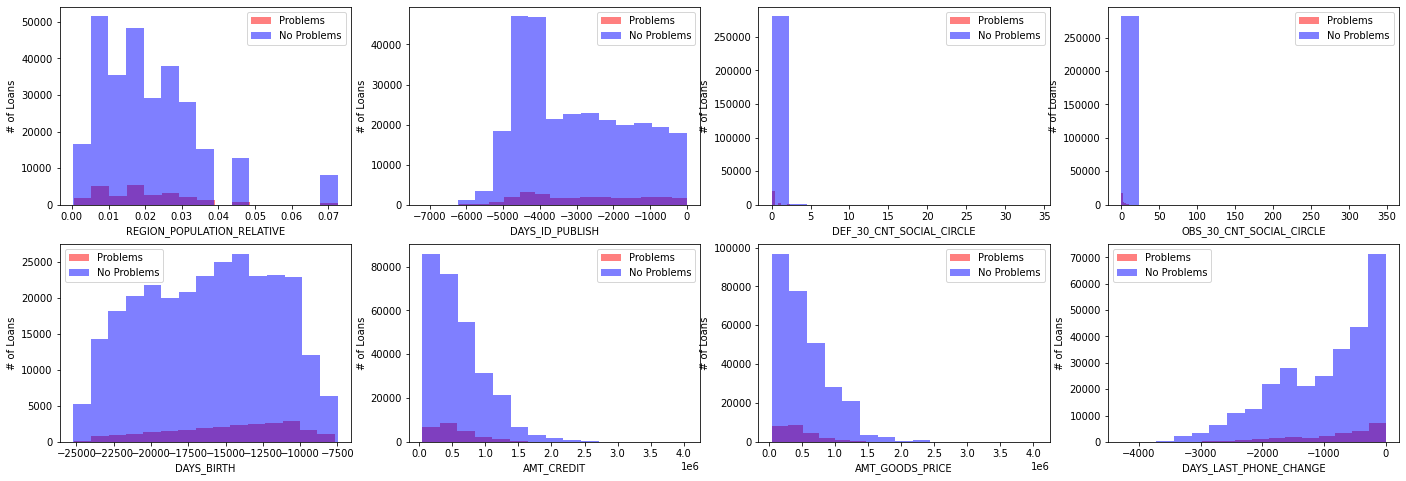

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(app_df, "REGION_POPULATION_RELATIVE", axs[0,0])
num_hist(app_df, "DAYS_ID_PUBLISH", axs[0,1])
num_hist(app_df, "DEF_30_CNT_SOCIAL_CIRCLE", axs[0,2])
num_hist(app_df, "OBS_30_CNT_SOCIAL_CIRCLE", axs[0,3])

num_hist(app_df, "DAYS_BIRTH", axs[1,0])
num_hist(app_df, "AMT_CREDIT", axs[1,1])
num_hist(app_df, "AMT_GOODS_PRICE", axs[1,2])
num_hist(app_df, "DAYS_LAST_PHONE_CHANGE", axs[1,3])

The original features, which are graphed below, were used to construct the new features. It's possible that you'll want to revisit these graphs in the future.

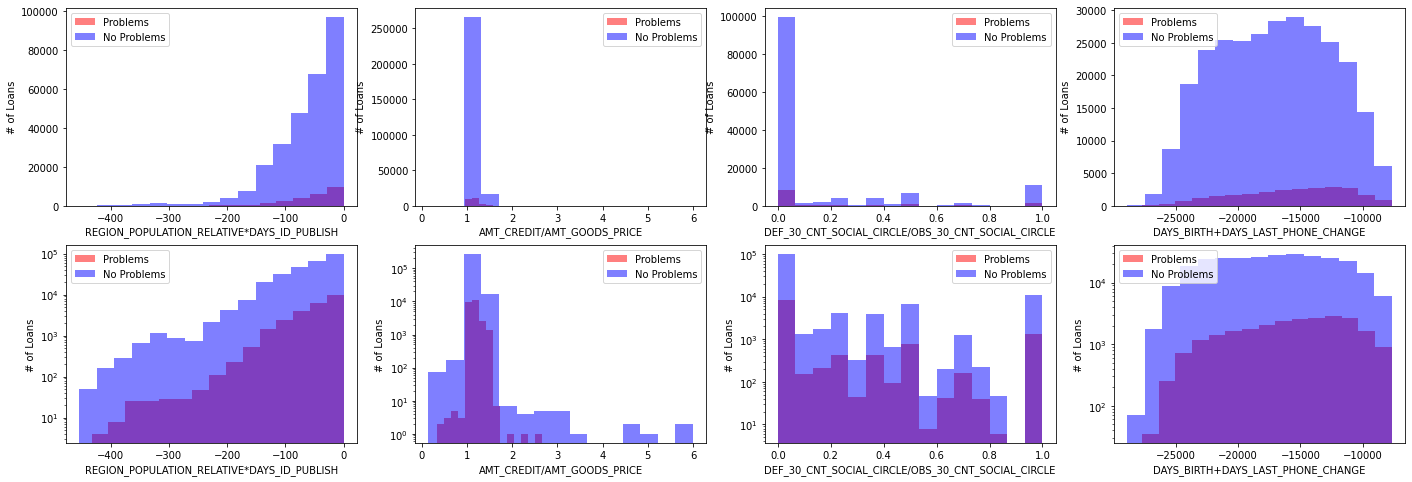

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(temp_app, "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", axs[0,0])
num_hist(temp_app, "AMT_CREDIT/AMT_GOODS_PRICE", axs[0,1])
num_hist(temp_app, "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE", axs[0,2])
num_hist(temp_app, "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE", axs[0,3])
# log graphs
num_hist(temp_app, "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", axs[1,0], True)
num_hist(temp_app, "AMT_CREDIT/AMT_GOODS_PRICE", axs[1,1], True)
num_hist(temp_app, "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE", axs[1,2], True)
num_hist(temp_app, "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE", axs[1,3], True)

These connections are pretty intriguing.

REGION_POPULATION_RELATIVE and DAYS_ID_PUBLISH have graphs with one high point in the middle, thanks to the graphs above this set. However, there is a clear trend in REGION_POPULATION_RELATION*DAYS_ID_PUBLISH: the further to the right, the more difficulty the client has with payback.

DEF_30_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE both contained a substantial number of the samples in one area, making it difficult to discern points apart, but DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE did a much better job of spreading those points out.

# Baseline Model for just Application Data

Let's create a basic model with just applicaiton data

In [ ]:
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])



In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = datasets["application_train"].loc[:, datasets['application_train'].columns != "TARGET"]
y_train = datasets["application_train"]['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[0] = ["Baseline", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "LogisticRegression"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.91996,0.917,9.6565,0.3952,LogisticRegression


# Baseline Model with our new features

In [ ]:
# create new features
app_df = datasets['application_train']

app_df["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['DAYS_ID_PUBLISH']
app_df["AMT_CREDIT/AMT_GOODS_PRICE"] = app_df['AMT_CREDIT'] / app_df['AMT_GOODS_PRICE']
app_df["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] / app_df['OBS_30_CNT_SOCIAL_CIRCLE']
app_df["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = app_df['DAYS_BIRTH'] + app_df['DAYS_LAST_PHONE_CHANGE']
app_df["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] + app_df['DEF_60_CNT_SOCIAL_CIRCLE']
app_df["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = app_df['AMT_GOODS_PRICE'] + app_df['DAYS_EMPLOYED']
app_df["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['AMT_GOODS_PRICE']

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = datasets["application_train"].loc[:, datasets['application_train'].columns != "TARGET"]
y_train = datasets["application_train"]['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[1] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression + new Application features"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.91996,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.00000,91.700,8.6859,0.3853,LogisticRegression + new Application features


Our additional features did not increase our accuracy, but they did improve the ROC AUC score. This is a win for us because the AUC score is the most essential statistic.

# New Features for Other Datasets

In [ ]:
def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

## Previous Applications

In [ ]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": "mean",
    "CNT_PAYMENT": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
})

## Previous PCB

In [ ]:
PCB_df_copy = datasets['POS_CASH_balance'].groupby('SK_ID_PREV').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

In [ ]:
POS_to_PA_df =  datasets['previous_application'].merge(PCB_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
PCB_df_temp = POS_to_PA_df.groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
PCB_df_temp=PCB_df_temp.rename({"CNT_INSTALMENT":"PREV_CNT_INSTALMENT","CNT_INSTALMENT_FUTURE":"PREV_CNT_INSTALMENT_FUTURE","MONTHS_BALANCE":"PREV_PCB_MONTHS_BALANCE" }, axis='columns')

In [ ]:
PA_df = pd.concat([PA_df, PCB_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(PCB_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_CNT_INSTALMENT", "PREV_CNT_INSTALMENT_FUTURE","PREV_PCB_MONTHS_BALANCE", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_CNT_INSTALMENT", "PREV_CNT_INSTALMENT_FUTURE","PREV_PCB_MONTHS_BALANCE" ]])

PREV_CNT_INSTALMENT          -0.038646
PREV_CNT_INSTALMENT_FUTURE    0.032835
PREV_PCB_MONTHS_BALANCE       0.050945
TARGET                        1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
PREV_CNT_INSTALMENT_FUTURE,6.69,20576
PREV_PCB_MONTHS_BALANCE,6.68,20544
PREV_CNT_INSTALMENT,5.35,16454


## Previous IP

In [ ]:
IP_df_copy = datasets['installments_payments'].groupby('SK_ID_PREV').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df_copy["SUM_MISSED"] = IP_df_copy["AMT_INSTALMENT"] - IP_df_copy["AMT_PAYMENT"]

In [ ]:
IP_to_PA_df =  datasets['previous_application'].merge(IP_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
IP_df_temp = IP_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min"
})
IP_df_temp = IP_df_temp.rename({"AMT_INSTALMENT":"PREV_AMT_INSTALMENT", "AMT_PAYMENT":"PREV_AMT_PAYMENT", "DAYS_INSTALMENT":"PREV_DAYS_INSTALMENT",  "DAYS_ENTRY_PAYMENT": "PREV_DAYS_ENTRY_PAYMENT"}, axis = 'columns')

In [ ]:
PA_df = pd.concat([PA_df, IP_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(IP_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT", "PREV_DAYS_INSTALMENT", "PREV_DAYS_ENTRY_PAYMENT", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT", "PREV_DAYS_INSTALMENT", "PREV_DAYS_ENTRY_PAYMENT" ]])

PREV_AMT_INSTALMENT       -0.018711
PREV_AMT_PAYMENT          -0.023428
PREV_DAYS_INSTALMENT       0.053545
PREV_DAYS_ENTRY_PAYMENT    0.053701
TARGET                     1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
PREV_DAYS_ENTRY_PAYMENT,5.89,18113
PREV_DAYS_INSTALMENT,5.89,18105
PREV_AMT_INSTALMENT,5.35,16454
PREV_AMT_PAYMENT,5.35,16454


## Previous CCB

In [ ]:
CCB_df_copy = datasets['credit_card_balance'].groupby('SK_ID_PREV').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})



In [ ]:
CCB_to_PA_df =  datasets['previous_application'].merge(CCB_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
CCB_df_temp = CCB_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count"
})
CCB_df_temp = CCB_df_temp.rename({"AMT_BALANCE":"PREV_AMT_BALANCE", "MONTHS_BALANCE": "PREV_CCB_MONTHS_BALANCE","AMT_CREDIT_LIMIT_ACTUAL":"PREV_AMT_CREDIT_LIMIT_ACTUAL"}, axis ='columns')

In [ ]:
PA_df = pd.concat([PA_df, CCB_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(CCB_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_AMT_BALANCE", "PREV_CCB_MONTHS_BALANCE", "PREV_AMT_CREDIT_LIMIT_ACTUAL", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_AMT_BALANCE", "PREV_CCB_MONTHS_BALANCE", "PREV_AMT_CREDIT_LIMIT_ACTUAL"]])

PREV_AMT_BALANCE                0.086693
PREV_CCB_MONTHS_BALANCE         0.049798
PREV_AMT_CREDIT_LIMIT_ACTUAL    0.018769
TARGET                          1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
PREV_AMT_BALANCE,74.66,229577
PREV_CCB_MONTHS_BALANCE,74.66,229577
PREV_AMT_CREDIT_LIMIT_ACTUAL,5.35,16454


## POS Cash Balances

In [ ]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

In [ ]:
comb_app = datasets['application_train'].merge(PCB_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "MONTHS_BALANCE"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"+"+key2] = comb_app[key1] + comb_app[key2]
      corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(comb_app['TARGET'])

test_df

,CNT_CHILDREN+CNT_INSTALMENT,CNT_CHILDREN+CNT_INSTALMENT_FUTURE,CNT_CHILDREN+MONTHS_BALANCE,AMT_INCOME_TOTAL+CNT_INSTALMENT,AMT_INCOME_TOTAL+CNT_INSTALMENT_FUTURE,AMT_INCOME_TOTAL+MONTHS_BALANCE,AMT_CREDIT+CNT_INSTALMENT,AMT_CREDIT+CNT_INSTALMENT_FUTURE,AMT_CREDIT+MONTHS_BALANCE,AMT_ANNUITY+CNT_INSTALMENT,...,AMT_REQ_CREDIT_BUREAU_MON+MONTHS_BALANCE,AMT_REQ_CREDIT_BUREAU_QRT+CNT_INSTALMENT,AMT_REQ_CREDIT_BUREAU_QRT+CNT_INSTALMENT_FUTURE,AMT_REQ_CREDIT_BUREAU_QRT+MONTHS_BALANCE,AMT_REQ_CREDIT_BUREAU_YEAR+CNT_INSTALMENT,AMT_REQ_CREDIT_BUREAU_YEAR+CNT_INSTALMENT_FUTURE,AMT_REQ_CREDIT_BUREAU_YEAR+MONTHS_BALANCE,DAYS_ID_PUBLISH+CNT_INSTALMENT,DAYS_ID_PUBLISH+CNT_INSTALMENT_FUTURE,DAYS_ID_PUBLISH+MONTHS_BALANCE
0,19.0,15.000000,-19.0,202519.0,202515.000000,202481.0,406616.5,4.066125e+05,406578.5,24719.5,...,-19.0,19.0,15.000000,-19.0,20.0,16.000000,-18.0,-2101.0,-2105.000000,-2139.0
1,28.0,5.785714,-77.0,270028.0,270005.785714,269923.0,1293530.5,1.293508e+06,1293425.5,35726.5,...,-77.0,28.0,5.785714,-77.0,28.0,5.785714,-77.0,-263.0,-285.214286,-368.0
2,4.0,2.250000,-27.0,67504.0,67502.250000,67473.0,135004.0,1.350022e+05,134973.0,6754.0,...,-27.0,4.0,2.250000,-27.0,4.0,2.250000,-27.0,-2527.0,-2528.750000,-2558.0
3,20.0,8.650000,-20.0,135020.0,135008.650000,134980.0,312702.5,3.126912e+05,312662.5,29706.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2417.0,-2428.350000,-2457.0
4,66.0,8.969697,-77.0,121566.0,121508.969697,121423.0,513066.0,5.130090e+05,512923.0,21931.5,...,-77.0,66.0,8.969697,-77.0,66.0,8.969697,-77.0,-3392.0,-3449.030303,-3535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,8.0,4.375000,-9.0,157508.0,157504.375000,157491.0,254708.0,2.547044e+05,254691.0,27566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1974.0,-1977.625000,-1991.0
307507,7.0,3.000000,-82.0,72007.0,72003.000000,71918.0,269557.0,2.695530e+05,269468.0,12008.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4083.0,-4087.000000,-4172.0
307508,17.0,2.000000,-96.0,153017.0,153002.000000,152904.0,677681.0,6.776660e+05,677568.0,29996.0,...,-95.0,17.0,2.000000,-96.0,18.0,3.000000,-95.0,-5133.0,-5148.000000,-5246.0
307509,20.0,10.350000,-11.0,171020.0,171010.350000,170989.0,370127.0,3.701173e+05,370096.0,20225.0,...,-11.0,20.0,10.350000,-11.0,20.0,10.350000,-11.0,-911.0,-920.650000,-942.0


In [ ]:
corrs

{'AMT_ANNUITY+CNT_INSTALMENT': -0.008515917780832676,
 'AMT_ANNUITY+CNT_INSTALMENT_FUTURE': -0.008440793501912184,
 'AMT_ANNUITY+MONTHS_BALANCE': -0.008338714976260993,
 'AMT_CREDIT+CNT_INSTALMENT': -0.02730806085465315,
 'AMT_CREDIT+CNT_INSTALMENT_FUTURE': -0.027297097637611626,
 'AMT_CREDIT+MONTHS_BALANCE': -0.02730186511138258,
 'AMT_GOODS_PRICE+CNT_INSTALMENT': -0.03656542567387583,
 'AMT_GOODS_PRICE+CNT_INSTALMENT_FUTURE': -0.03655459975717435,
 'AMT_GOODS_PRICE+MONTHS_BALANCE': -0.03655872795487446,
 'AMT_INCOME_TOTAL+CNT_INSTALMENT': -0.0017020454766113427,
 'AMT_INCOME_TOTAL+CNT_INSTALMENT_FUTURE': -0.0016998058664761252,
 'AMT_INCOME_TOTAL+MONTHS_BALANCE': -0.0016916258330551884,
 'AMT_REQ_CREDIT_BUREAU_DAY+CNT_INSTALMENT': -0.033312974162881134,
 'AMT_REQ_CREDIT_BUREAU_DAY+CNT_INSTALMENT_FUTURE': 0.030706893892791954,
 'AMT_REQ_CREDIT_BUREAU_DAY+MONTHS_BALANCE': 0.05194559120209246,
 'AMT_REQ_CREDIT_BUREAU_HOUR+CNT_INSTALMENT': -0.03332075980975123,
 'AMT_REQ_CREDIT_BUREAU_HO

## Instalment Payments

In [ ]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df["SUM_MISSED"] = IP_df["AMT_INSTALMENT"] - IP_df["AMT_PAYMENT"]

In [ ]:
comb_app = datasets['application_train'].merge(IP_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["AMT_INSTALMENT", "AMT_PAYMENT", "DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT", "SUM_MISSED"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"-"+key2] = comb_app[key1] - comb_app[key2]
      corrs[key1+"-"+key2] = test_df[key1+"-"+key2].corr(comb_app['TARGET'])

test_df

,CNT_CHILDREN-AMT_INSTALMENT,CNT_CHILDREN-AMT_PAYMENT,CNT_CHILDREN-DAYS_INSTALMENT,CNT_CHILDREN-DAYS_ENTRY_PAYMENT,CNT_CHILDREN-SUM_MISSED,AMT_INCOME_TOTAL-AMT_INSTALMENT,AMT_INCOME_TOTAL-AMT_PAYMENT,AMT_INCOME_TOTAL-DAYS_INSTALMENT,AMT_INCOME_TOTAL-DAYS_ENTRY_PAYMENT,AMT_INCOME_TOTAL-SUM_MISSED,...,AMT_REQ_CREDIT_BUREAU_YEAR-AMT_INSTALMENT,AMT_REQ_CREDIT_BUREAU_YEAR-AMT_PAYMENT,AMT_REQ_CREDIT_BUREAU_YEAR-DAYS_INSTALMENT,AMT_REQ_CREDIT_BUREAU_YEAR-DAYS_ENTRY_PAYMENT,AMT_REQ_CREDIT_BUREAU_YEAR-SUM_MISSED,DAYS_ID_PUBLISH-AMT_INSTALMENT,DAYS_ID_PUBLISH-AMT_PAYMENT,DAYS_ID_PUBLISH-DAYS_INSTALMENT,DAYS_ID_PUBLISH-DAYS_ENTRY_PAYMENT,DAYS_ID_PUBLISH-SUM_MISSED
0,-219625.695,-219625.695,565.0,587.0,0.000,-17125.695,-17125.695,203065.0,203087.0,202500.000,...,-219624.695,-219624.695,566.0,588.0,1.000,-221745.695,-221745.695,-1555.0,-1533.0,-2120.000
1,-1618864.650,-1618864.650,2310.0,2324.0,0.000,-1348864.650,-1348864.650,272310.0,272324.0,270000.000,...,-1618864.650,-1618864.650,2310.0,2324.0,0.000,-1619155.650,-1619155.650,2019.0,2033.0,-291.000
2,-21288.465,-21288.465,784.0,795.0,0.000,46211.535,46211.535,68284.0,68295.0,67500.000,...,-21288.465,-21288.465,784.0,795.0,0.000,-23819.465,-23819.465,-1747.0,-1736.0,-2531.000
3,-1007153.415,-1007153.415,545.0,575.0,0.000,-872153.415,-872153.415,135545.0,135575.0,135000.000,...,NaN,NaN,NaN,NaN,NaN,-1009590.415,-1009590.415,-1892.0,-1862.0,-2437.000
4,-835985.340,-806127.975,2326.0,2318.0,-29857.365,-714485.340,-684627.975,123826.0,123818.0,91642.635,...,-835985.340,-806127.975,2326.0,2318.0,-29857.365,-839443.340,-809585.975,-1132.0,-1140.0,-33315.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-52450.470,-52450.470,210.0,237.0,0.000,105049.530,105049.530,157710.0,157737.0,157500.000,...,NaN,NaN,NaN,NaN,NaN,-54432.470,-54432.470,-1772.0,-1745.0,-1982.000
307507,-60419.205,-60419.205,2466.0,2470.0,0.000,11580.795,11580.795,74466.0,74470.0,72000.000,...,NaN,NaN,NaN,NaN,NaN,-64509.205,-64509.205,-1624.0,-1620.0,-4090.000
307508,-61595.910,-57622.815,2915.0,2915.0,-3973.095,91404.090,95377.185,155915.0,155915.0,149026.905,...,-61594.910,-57621.815,2916.0,2916.0,-3972.095,-66745.910,-62772.815,-2235.0,-2235.0,-9123.095
307509,-194556.825,-194556.825,291.0,317.0,0.000,-23556.825,-23556.825,171291.0,171317.0,171000.000,...,-194556.825,-194556.825,291.0,317.0,0.000,-195487.825,-195487.825,-640.0,-614.0,-931.000


In [ ]:
corrs

{'AMT_ANNUITY-AMT_INSTALMENT': 0.01971621123408409,
 'AMT_ANNUITY-AMT_PAYMENT': 0.024296033764303865,
 'AMT_ANNUITY-DAYS_ENTRY_PAYMENT': -0.012659572423444008,
 'AMT_ANNUITY-DAYS_INSTALMENT': -0.012655013549201491,
 'AMT_ANNUITY-SUM_MISSED': -0.0284785922414645,
 'AMT_CREDIT-AMT_INSTALMENT': 0.007315135880388606,
 'AMT_CREDIT-AMT_PAYMENT': 0.01232135205099979,
 'AMT_CREDIT-DAYS_ENTRY_PAYMENT': -0.027842341138886666,
 'AMT_CREDIT-DAYS_INSTALMENT': -0.027835645523273583,
 'AMT_CREDIT-SUM_MISSED': -0.03587613896728747,
 'AMT_GOODS_PRICE-AMT_INSTALMENT': 0.0047879029613704886,
 'AMT_GOODS_PRICE-AMT_PAYMENT': 0.009923263711473666,
 'AMT_GOODS_PRICE-DAYS_ENTRY_PAYMENT': -0.03711095933545598,
 'AMT_GOODS_PRICE-DAYS_INSTALMENT': -0.03710582679088353,
 'AMT_GOODS_PRICE-SUM_MISSED': -0.044354656767360834,
 'AMT_INCOME_TOTAL-AMT_INSTALMENT': 0.019063287531481916,
 'AMT_INCOME_TOTAL-AMT_PAYMENT': 0.023633848442083178,
 'AMT_INCOME_TOTAL-DAYS_ENTRY_PAYMENT': -0.0020267002947920083,
 'AMT_INCOME_TOT

## Bureau

In [ ]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE": "min",
    "CREDIT_ACTIVE": "max",
    "DAYS_CREDIT": "mean",
    "AMT_CREDIT_SUM": "max",
})

In [ ]:
comb_app = datasets['application_train'].merge(B_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["DAYS_CREDIT", "AMT_CREDIT_SUM"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"*"+key2] = comb_app[key1] * comb_app[key2]
      corrs[key1+"*"+key2] = test_df[key1+"*"+key2].corr(comb_app['TARGET'])

test_df

,CNT_CHILDREN*DAYS_CREDIT,CNT_CHILDREN*AMT_CREDIT_SUM,AMT_INCOME_TOTAL*DAYS_CREDIT,AMT_INCOME_TOTAL*AMT_CREDIT_SUM,AMT_CREDIT*DAYS_CREDIT,AMT_CREDIT*AMT_CREDIT_SUM,AMT_ANNUITY*DAYS_CREDIT,AMT_ANNUITY*AMT_CREDIT_SUM,REGION_POPULATION_RELATIVE*DAYS_CREDIT,REGION_POPULATION_RELATIVE*AMT_CREDIT_SUM,...,AMT_REQ_CREDIT_BUREAU_WEEK*DAYS_CREDIT,AMT_REQ_CREDIT_BUREAU_WEEK*AMT_CREDIT_SUM,AMT_REQ_CREDIT_BUREAU_MON*DAYS_CREDIT,AMT_REQ_CREDIT_BUREAU_MON*AMT_CREDIT_SUM,AMT_REQ_CREDIT_BUREAU_QRT*DAYS_CREDIT,AMT_REQ_CREDIT_BUREAU_QRT*AMT_CREDIT_SUM,AMT_REQ_CREDIT_BUREAU_YEAR*DAYS_CREDIT,AMT_REQ_CREDIT_BUREAU_YEAR*AMT_CREDIT_SUM,DAYS_ID_PUBLISH*DAYS_CREDIT,DAYS_ID_PUBLISH*AMT_CREDIT_SUM
0,-0.0,0.0,-1.769850e+08,9.112500e+10,-3.553662e+08,1.829689e+11,-2.158824e+07,1.111522e+10,-16.432074,8460.45000,...,-0.0,0.0,-0.000000,0.0,-0.0,0.0,-874.000000,450000.0,1.852880e+06,-9.540000e+08
1,-0.0,0.0,-3.782025e+08,2.187000e+11,-1.811874e+09,1.047737e+12,-5.000467e+07,2.891578e+10,-4.960056,2868.21000,...,-0.0,0.0,-0.000000,0.0,-0.0,0.0,-0.000000,0.0,4.076182e+05,-2.357100e+08
2,-0.0,0.0,-5.852250e+07,6.381302e+09,-1.170450e+08,1.276260e+10,-5.852250e+06,6.381302e+08,-8.697744,948.40321,...,-0.0,0.0,-0.000000,0.0,-0.0,0.0,-0.000000,0.0,2.194377e+06,-2.392752e+08
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.0,0.0,-1.396035e+08,1.776938e+10,-5.894370e+08,7.502625e+10,-2.512346e+07,3.197829e+09,-32.933787,4191.96375,...,-0.0,0.0,-0.000000,0.0,-0.0,0.0,-0.000000,0.0,3.973242e+06,-5.057325e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,-0.0,0.0,-1.327275e+08,3.442500e+11,-5.878735e+08,1.524744e+12,-2.600678e+07,6.745275e+10,-4.339235,11254.50000,...,-0.0,0.0,-867.500000,2250000.0,-0.0,0.0,-867.500000,2250000.0,4.467625e+06,-1.158750e+10
307509,-0.0,0.0,-1.887840e+08,7.695000e+09,-4.085981e+08,1.665482e+10,-2.230632e+07,9.092250e+08,-5.865552,239.08500,...,-0.0,0.0,-0.000000,0.0,-0.0,0.0,-0.000000,0.0,1.027824e+06,-4.189500e+07


In [ ]:
corrs

{'AMT_ANNUITY*AMT_CREDIT_SUM': -0.016500855416944602,
 'AMT_ANNUITY*DAYS_CREDIT': 0.06366637507783798,
 'AMT_CREDIT*AMT_CREDIT_SUM': -0.020905415248609192,
 'AMT_CREDIT*DAYS_CREDIT': 0.06440242758103888,
 'AMT_GOODS_PRICE*AMT_CREDIT_SUM': -0.02227517007935924,
 'AMT_GOODS_PRICE*DAYS_CREDIT': 0.06960594936255725,
 'AMT_INCOME_TOTAL*AMT_CREDIT_SUM': -0.013364529671712626,
 'AMT_INCOME_TOTAL*DAYS_CREDIT': 0.051039812692558986,
 'AMT_REQ_CREDIT_BUREAU_DAY*AMT_CREDIT_SUM': -0.0003910004430030086,
 'AMT_REQ_CREDIT_BUREAU_DAY*DAYS_CREDIT': 0.0008101843356715257,
 'AMT_REQ_CREDIT_BUREAU_HOUR*AMT_CREDIT_SUM': -0.0009122680340084818,
 'AMT_REQ_CREDIT_BUREAU_HOUR*DAYS_CREDIT': 0.003012818168872427,
 'AMT_REQ_CREDIT_BUREAU_MON*AMT_CREDIT_SUM': -0.008367377934013686,
 'AMT_REQ_CREDIT_BUREAU_MON*DAYS_CREDIT': 0.020320771422730508,
 'AMT_REQ_CREDIT_BUREAU_QRT*AMT_CREDIT_SUM': -0.002262514401953606,
 'AMT_REQ_CREDIT_BUREAU_QRT*DAYS_CREDIT': 0.01603539595100403,
 'AMT_REQ_CREDIT_BUREAU_WEEK*AMT_CREDIT_

### Bureau Balance dataset




In [ ]:
BB_df = datasets['bureau_balance'].groupby('SK_ID_BUREAU').agg({
    "MONTHS_BALANCE": "min",
    "STATUS": ["max", "min", "count"] 
})




In [ ]:
temp = pd.DataFrame({"MONTHS_BALANCE_MIN": BB_df["MONTHS_BALANCE"]["min"],  "STATUS_MAX": BB_df["STATUS"]["max"], "STATUS_MIN":BB_df["STATUS"]["min"], "STATUS_COUNT": BB_df["STATUS"]["count"]})
BB_df = temp

In [ ]:
BB_to_B_df =  datasets['bureau'].merge(BB_df, how='left', on='SK_ID_BUREAU')
BB_to_B_df = BB_to_B_df.dropna(subset = ["STATUS_MAX","STATUS_MIN"])
B_df_temp = BB_to_B_df.groupby('SK_ID_CURR').agg({
    "MONTHS_BALANCE_MIN": "min",
    "STATUS_MIN": "min",
    "STATUS_MAX" : 'max',
    "STATUS_COUNT": "count"
})

In [ ]:
B_df = pd.concat([B_df, B_df_temp], axis=1)

### Credit Card Balances

In [ ]:
temp_app = datasets['application_train'].merge(B_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})

In [ ]:
comb_app = datasets['application_train'].merge(CCB_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["AMT_BALANCE", "MONTHS_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"+"+key2] = comb_app[key1] + comb_app[key2]
      corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(comb_app['TARGET'])

test_df

,CNT_CHILDREN+AMT_BALANCE,CNT_CHILDREN+MONTHS_BALANCE,CNT_CHILDREN+AMT_CREDIT_LIMIT_ACTUAL,AMT_INCOME_TOTAL+AMT_BALANCE,AMT_INCOME_TOTAL+MONTHS_BALANCE,AMT_INCOME_TOTAL+AMT_CREDIT_LIMIT_ACTUAL,AMT_CREDIT+AMT_BALANCE,AMT_CREDIT+MONTHS_BALANCE,AMT_CREDIT+AMT_CREDIT_LIMIT_ACTUAL,AMT_ANNUITY+AMT_BALANCE,...,AMT_REQ_CREDIT_BUREAU_MON+AMT_CREDIT_LIMIT_ACTUAL,AMT_REQ_CREDIT_BUREAU_QRT+AMT_BALANCE,AMT_REQ_CREDIT_BUREAU_QRT+MONTHS_BALANCE,AMT_REQ_CREDIT_BUREAU_QRT+AMT_CREDIT_LIMIT_ACTUAL,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_BALANCE,AMT_REQ_CREDIT_BUREAU_YEAR+MONTHS_BALANCE,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_CREDIT_LIMIT_ACTUAL,DAYS_ID_PUBLISH+AMT_BALANCE,DAYS_ID_PUBLISH+MONTHS_BALANCE,DAYS_ID_PUBLISH+AMT_CREDIT_LIMIT_ACTUAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,-6.0,6.0,135000.0,134994.0,135006.0,312682.5,312676.5,312688.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2437.0,-2443.0,-2431.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corrs

{'AMT_ANNUITY+AMT_BALANCE': 0.08371049424218174,
 'AMT_ANNUITY+AMT_CREDIT_LIMIT_ACTUAL': -0.025063558915545698,
 'AMT_ANNUITY+MONTHS_BALANCE': -0.024771390825012576,
 'AMT_CREDIT+AMT_BALANCE': -0.009802925077219877,
 'AMT_CREDIT+AMT_CREDIT_LIMIT_ACTUAL': -0.03503374158665453,
 'AMT_CREDIT+MONTHS_BALANCE': -0.03502380865670211,
 'AMT_GOODS_PRICE+AMT_BALANCE': -0.015940860495845664,
 'AMT_GOODS_PRICE+AMT_CREDIT_LIMIT_ACTUAL': -0.04367573383904863,
 'AMT_GOODS_PRICE+MONTHS_BALANCE': -0.04366514956971031,
 'AMT_INCOME_TOTAL+AMT_BALANCE': 0.048450928829204605,
 'AMT_INCOME_TOTAL+AMT_CREDIT_LIMIT_ACTUAL': -0.017685313734971734,
 'AMT_INCOME_TOTAL+MONTHS_BALANCE': -0.0176466574023929,
 'AMT_REQ_CREDIT_BUREAU_DAY+AMT_BALANCE': 0.08599405922754702,
 'AMT_REQ_CREDIT_BUREAU_DAY+AMT_CREDIT_LIMIT_ACTUAL': -0.058841283458255025,
 'AMT_REQ_CREDIT_BUREAU_DAY+MONTHS_BALANCE': 0.05975592643099151,
 'AMT_REQ_CREDIT_BUREAU_HOUR+AMT_BALANCE': 0.08599405852655541,
 'AMT_REQ_CREDIT_BUREAU_HOUR+AMT_CREDIT_LIM

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",
  
  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[2] = ["Baseline", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "LogisticRegression + other datasets"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets


This doesn't really improve our ROC_AUC score very much

# Baseline with new feature for all data

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[3] = ["Baseline", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "LogisticRegression + other datasets + new features"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...


In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[4] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3),
                   train_time, test_time, "LogisticRegression + even more data"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.000000,91.700,17.7821,0.6412,LogisticRegression + even more data


# Tweaking Imputers

Perhaps we might employ a constant strategy with the categorical imputer. Rather than putting NaN data to the most common category, perhaps we could create a new category for all of this information. This would deal with particular categories, such as employment data types, where unemployed clients appeared to be tagged as NaN and shouldn't be grouped with other categories.

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[5] = ["Baseline", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "LogisticRegression w/ Constant Imputer"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.000000,91.700,17.7821,0.6412,LogisticRegression + even more data
5,Baseline,0.747196,92.000000,91.700,13.4003,0.9545,LogisticRegression w/ Constant Imputer


We're comparing this test to experiment 3 because it doesn't include the "even more data" from the prior test, and it performs better. In the future, we should keep employing this adjustment to the imputer.

# Untuned LGBM

Let's train an LGBM Classifier on the data from application plus the data from our datasets and new engineered features

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[6] = ["LGBM", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "Untuned LGBM"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.000000,91.700,17.7821,0.6412,LogisticRegression + even more data
5,Baseline,0.747196,92.000000,91.700,13.4003,0.9545,LogisticRegression w/ Constant Imputer
6,LGBM,0.764011,0.920048,0.918,28.4584,2.2212,Untuned LGBM
7,LGBM,0.763808,92.000000,91.800,58.8361,1.2368,Untuned LGBM + aggregated datasets
8,LGBM,0.764011,92.000000,91.800,28.4584,2.2212,LGBM tuned


As you can see, it outperforms all other models we've seen so far. We still need to fine-tune it, and we can add more data if necessary.

# Adding New Dataset Features

These characteristics result from combining the Bureau dataset with the 'bureau_balance' dataset and utilizing SK_ID_PREV to obtain additional data for the previous application dataset.

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[7] = ["LGBM", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned LGBM + aggregated datasets"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.000000,91.700,17.7821,0.6412,LogisticRegression + even more data
5,Baseline,0.747196,92.000000,91.700,13.4003,0.9545,LogisticRegression w/ Constant Imputer
6,LGBM,0.755898,92.000000,91.700,55.4857,0.9255,Untuned LGBM
7,LGBM,0.763808,92.000000,91.800,58.8361,1.2368,Untuned LGBM + aggregated datasets


These new additions unquestionably improve our model. Now we must use Grid Search to optimize it.

# Grid Search for LGBM

We checked all other hyperparameters before evaluating n_estimators because Grid Search takes a long time when testing for greater values of n_estimators.

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline_with_predictor = Pipeline([
  ("preprocessing", preprocess_pipeline),
  ("predictor", LGBMClassifier(colsample_bytree=0.1, max_depth=5, n_estimators=100, num_leaves=20, min_split_gain=1))
])

# Execute the grid search
params = {
    'predictor__colsample_bytree': [0.0, 0.1, 0.2, 0.5],
    'predictor__max_depth': [-1, 3, 5, 10],
    'predictor__min_split_gain': [0.0, 0.5, 1],
    'predictor__num_leaves': [10, 20, 31, 42],
}

grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=3,
                            n_jobs=-1, verbose=True)

# Tuned LGBM

Let's combine the extra data from the "More Data" experiment with an LGBM model that has been optimized for hyperparameters.


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier(colsample_bytree=0.5, max_depth=10, n_estimators=500, num_leaves=31, min_split_gain=1))
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)



In [ ]:
results.loc[8] = ["LGBM", roc,logit_score_train, np.round(logit_score_test,3), 
                   train_time, test_time, "LGBM tuned"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,0.919960,0.917,9.6565,0.3952,LogisticRegression
1,Baseline,0.739299,92.000000,91.700,8.6859,0.3853,LogisticRegression + new Application features
2,Baseline,0.740311,0.919982,0.917,20.9558,0.5814,LogisticRegression + other datasets
3,Baseline,0.745049,92.000000,91.700,23.2227,0.6177,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.000000,91.700,17.7821,0.6412,LogisticRegression + even more data
5,Baseline,0.747196,92.000000,91.700,13.4003,0.9545,LogisticRegression w/ Constant Imputer
6,LGBM,0.755898,92.000000,91.700,55.4857,0.9255,Untuned LGBM
7,LGBM,0.763808,92.000000,91.800,58.8361,1.2368,Untuned LGBM + aggregated datasets
8,LGBM,0.764011,92.000000,91.800,28.4584,2.2212,LGBM tuned


In [ ]:
# from matplotlib import pyplot as plt
model = full_pipeline.steps[1][1]
features = list(full_pipeline.steps[0][1].transformer_list[1][1].steps[2][1].get_feature_names(cat_features)) + num_features

pd.DataFrame({'Value':model.feature_importances_,'Feature':features}).sort_values(by="Value",ascending=False).tail(25)

,Value,Feature
60,0,OCCUPATION_TYPE_Secretaries
59,0,OCCUPATION_TYPE_Sales staff
58,0,OCCUPATION_TYPE_Realty agents
52,0,OCCUPATION_TYPE_IT staff
89,0,CREDIT_TYPE_Car loan
91,0,CREDIT_TYPE_Consumer credit
131,0,DAYS_BIRTH
112,0,STATUS_MIN_X
129,0,ELEVATORS_AVG
128,0,REGION_POPULATION_RELATIVE


Interestingly, some of our finest correlation data, such as FLOORSMIN_AVG and ELEVATORS_AVG, are completely ignored by our model. This could be because they weren't beneficial because so much data was missing for so many samples. This could possibly be due to its strong correlation with other similar traits, such as TOTALAREA MODE.

Regrettably, it appears that CREDIT_ACTIVE was virtually completely useless.

In [ ]:
pd.DataFrame({'Value':model.feature_importances_,'Feature':features}).sort_values(by="Value",ascending=False).head(50)

,Value,Feature
39,605,HOUR_APPR_PROCESS_START_18
0,604,FLAG_DOCUMENT_3_0
1,580,FLAG_DOCUMENT_3_1
9,544,NAME_INCOME_TYPE_Commercial associate
15,533,NAME_INCOME_TYPE_Working
2,518,REGION_RATING_CLIENT_1
42,490,HOUR_APPR_PROCESS_START_21
4,486,REGION_RATING_CLIENT_3
25,483,HOUR_APPR_PROCESS_START_4
22,482,HOUR_APPR_PROCESS_START_1


The most useful information is categorical. It appears that HOUR_APPR_PROCESS_START and FLAG_DOCUMENT_3 were very useful. Since FLAG DOCUMENT 4 is in the data set, it's intriguing that the flags for the other documents were considerably less useful.

As far as we can tell, there are no significant numerical features.

In [ ]:
imp_df = pd.DataFrame({'Value':model.feature_importances_,'Feature':features})
print("Unimportant data points: {}%".format(round(sum(imp_df["Value"] == 0) / len(imp_df)*100, 2)))

Unimportant data points: 35.84%


Overall, it appears that our model did not utilise roughly 34% of our features. While some of the numerical features, such as OCCUPATION_TYPE, had data points in both the most useful and least useful features due to the large number of possible values, categorical features, such as OCCUPATION_TYPE, had data points in both the most useful and least useful features due to the large number of possible values.

# Buliding Deeplearning Model

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
DATA_DIR = "home-credit-default-risk" # folder where unzipped files are

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


## Load In Datasets

In [2]:
## Previous Applications

In [3]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": "mean",
    "CNT_PAYMENT": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
})

In [4]:
PCB_df_copy = datasets['POS_CASH_balance'].groupby('SK_ID_PREV').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
POS_to_PA_df =  datasets['previous_application'].merge(PCB_df_copy, how='left', on='SK_ID_PREV')
PCB_df_temp = POS_to_PA_df.groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
PCB_df_temp=PCB_df_temp.rename({"CNT_INSTALMENT":"PREV_CNT_INSTALMENT","CNT_INSTALMENT_FUTURE":"PREV_CNT_INSTALMENT_FUTURE","MONTHS_BALANCE":"PREV_PCB_MONTHS_BALANCE" }, axis='columns')
PA_df = pd.concat([PA_df, PCB_df_temp], axis=1)

In [5]:
IP_df_copy = datasets['installments_payments'].groupby('SK_ID_PREV').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df_copy["SUM_MISSED"] = IP_df_copy["AMT_INSTALMENT"] - IP_df_copy["AMT_PAYMENT"]
IP_to_PA_df =  datasets['previous_application'].merge(IP_df_copy, how='left', on='SK_ID_PREV')
IP_df_temp = IP_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min"
})
IP_df_temp = IP_df_temp.rename({"AMT_INSTALMENT":"PREV_AMT_INSTALMENT", "AMT_PAYMENT":"PREV_AMT_PAYMENT", "DAYS_INSTALMENT":"PREV_DAYS_INSTALMENT",  "DAYS_ENTRY_PAYMENT": "PREV_DAYS_ENTRY_PAYMENT"}, axis = 'columns')
PA_df = pd.concat([PA_df, IP_df_temp], axis=1)

In [6]:
CCB_df_copy = datasets['credit_card_balance'].groupby('SK_ID_PREV').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})
CCB_to_PA_df =  datasets['previous_application'].merge(CCB_df_copy, how='left', on='SK_ID_PREV')
CCB_df_temp = CCB_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count"
})
CCB_df_temp = CCB_df_temp.rename({"AMT_BALANCE":"PREV_AMT_BALANCE", "MONTHS_BALANCE": "PREV_CCB_MONTHS_BALANCE","AMT_CREDIT_LIMIT_ACTUAL":"PREV_AMT_CREDIT_LIMIT_ACTUAL"}, axis ='columns')
PA_df = pd.concat([PA_df, CCB_df_temp], axis=1)

## POS Cash Balances

In [7]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

## Instalment Payments

In [8]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df["SUM_MISSED"] = IP_df["AMT_INSTALMENT"] - IP_df["AMT_PAYMENT"]

## Bureau

In [9]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE": "min",
    "CREDIT_ACTIVE": "max",
    "DAYS_CREDIT": "mean",
    "AMT_CREDIT_SUM": "max",
})

In [11]:
BB_df = datasets['bureau_balance'].groupby('SK_ID_BUREAU').agg({
    "MONTHS_BALANCE": "min",
    "STATUS": ["max", "min", "count"] 
})
temp = pd.DataFrame({"MONTHS_BALANCE_MIN": BB_df["MONTHS_BALANCE"]["min"],  "STATUS_MAX": BB_df["STATUS"]["max"], "STATUS_MIN":BB_df["STATUS"]["min"], "STATUS_COUNT": BB_df["STATUS"]["count"]})
BB_df = temp
BB_to_B_df =  datasets['bureau'].merge(BB_df, how='left', on='SK_ID_BUREAU')
BB_to_B_df = BB_to_B_df.dropna(subset = ["STATUS_MAX","STATUS_MIN"])
B_df_temp = BB_to_B_df.groupby('SK_ID_CURR').agg({
    "MONTHS_BALANCE_MIN": "min",
    "STATUS_MIN": "min",
    "STATUS_MAX" : 'max',
    "STATUS_COUNT": "count"
})
B_df = pd.concat([B_df, B_df_temp], axis=1)

In [12]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})

In [13]:
# initialize results table
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Deep Learning Model

In [14]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
from time import time

app = datasets["application_train"]
train_x = app.loc[:, app.columns != "TARGET"]
train_y = app["TARGET"]
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)



In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

# preprocess data
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [17]:
# globals
batch_size = 64
num_epochs = 100
num_in = train_x.shape[1]
num_layer_1 = 20
num_output = 2

In [18]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [19]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

- For our data, we constructed a Neural Network model. We only used data from application train and application test when we first built it to ensure that it worked. Before entering our data into our model, we used our sklearn pipeline to preprocess it. Our architecture was also quite simple.

- 

In [20]:
from time import time

losses = []
test_losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

- The number of traits we had was estimated to be around 78. Before moving to our hidden layer, which we arbitrarily determined to be 20 nodes large, we employed a ReLU activation function. For our output, we used softmax. 

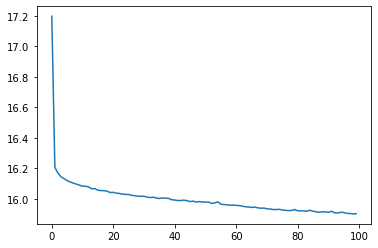

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses, label="train loss")

- We trained this model for 100 epochs and a batch size of 64. Here is the loss over time:

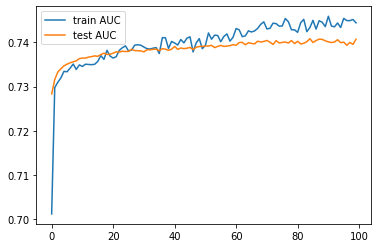

In [22]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

- And here is the AUC scores over time:

In [ ]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

In [24]:
results.loc[0] = ["Deep Learning", roc, "--", "--", 
                   train_time, test_time, "Deep Learning w/ Application Data"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data


# Adding All Features

In [26]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [27]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [28]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)



In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [30]:
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [31]:
batch_size = 64
num_epochs = 100
num_in = train_x.shape[1]
num_layer_1 = 20
num_output = 2

In [32]:
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [33]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [34]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

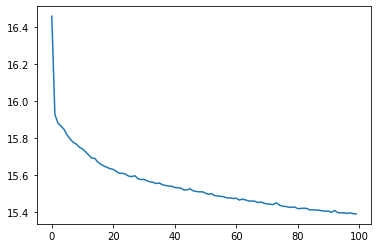

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

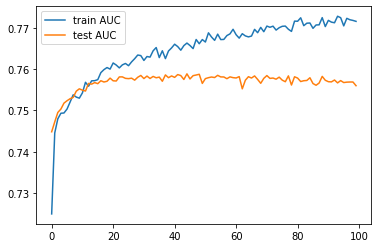

In [36]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [37]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

In [38]:
results.loc[1] = ["Deep Learning", roc, "--", "--", 
                   train_time, test_time, "Deep Learning w/ all other data"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data
1,Deep Learning,0.755966,--,--,893.774806,0.038644,Deep Learning w/ all other data


# Adam Optimizer

In [39]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [40]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [41]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [43]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [44]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [45]:
# globals
# note: realistically we can only get 20 epochs before overfitting
batch_size = 64
num_epochs = 20
num_layer_1 = 20
num_in = train_x.shape[1]
num_output = 2

In [46]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output),
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999))
loss_fn = nn.BCELoss()

In [47]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

- As our optimizer, we chose Stochastic Gradient Descent and Binary Cross-Entropy as our loss function, which is defined as: 

- ![title](./i5.png)

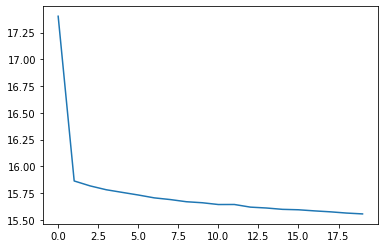

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

We achieved a final ROC_AUC of 0.739, which is actually better than our baseline model for the same data, which was 0.734 for our test dataset. We then added the rest of the features and switched the optimizer to Adam, since it’s usually the better choice. For all other models, we have 173 input features. We chose to run it for 20 epochs after some experimenting.

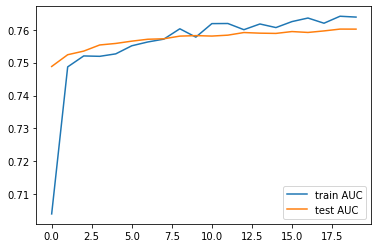

In [49]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [50]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [51]:
results.loc[2] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "Adam optimizer"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data
1,Deep Learning,0.755966,--,--,893.774806,0.038644,Deep Learning w/ all other data
2,Deep Learning,0.760161,--,0.917489,197.976691,0.040780,Adam optimizer


## Kaggle Submission

In [52]:
test = datasets['application_test']
test = test.merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')

test["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = test['REGION_POPULATION_RELATIVE'] * test['DAYS_ID_PUBLISH']
test["AMT_CREDIT/AMT_GOODS_PRICE"] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] / test['OBS_30_CNT_SOCIAL_CIRCLE']
test["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = test['DAYS_BIRTH'] + test['DAYS_LAST_PHONE_CHANGE']
test["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] + test['DEF_60_CNT_SOCIAL_CIRCLE']
test["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = test['AMT_GOODS_PRICE'] + test['DAYS_EMPLOYED']
test["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = test['REGION_POPULATION_RELATIVE'] * test['AMT_GOODS_PRICE']

test["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["CNT_PAYMENT"]
test["DAYS_BIRTH+MONTHS_BALANCE"] = test["DAYS_BIRTH"] + test["MONTHS_BALANCE_x"]
test["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["DAYS_ENTRY_PAYMENT"]
test["DAYS_BIRTH*DAYS_CREDIT"] = test["DAYS_BIRTH"] * test["DAYS_CREDIT"]

In [53]:
# convert test to tensor
test_numpy = scaler.transform(test)
test_tensor = torch.from_numpy(test_numpy).float()

preds = model(test_tensor)[:, 0].detach().numpy()
submit_df = test[['SK_ID_CURR']]
submit_df['TARGET'] = preds

submit_df.to_csv("submission.csv",index=False)

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.037238
1,100005,0.169940
2,100013,0.023183
3,100028,0.041304
4,100038,0.172269


In [54]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "NN submission"

100% 878k/878k [00:00<00:00, 1.45MB/s]
Successfully submitted to Home Credit Default Risk

In [55]:
# More Layers

In [56]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [57]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [58]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, stratify=train_y, random_state=30)

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [60]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [61]:
# globals
# note: realistically we can only get 20 epochs before overfitting
batch_size = 64
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

In [62]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [63]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.1),
        nn.Linear(32, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

In [64]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

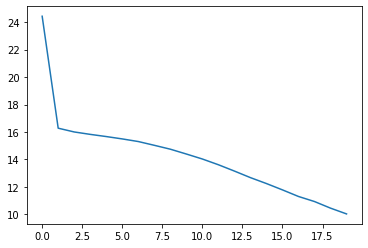

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

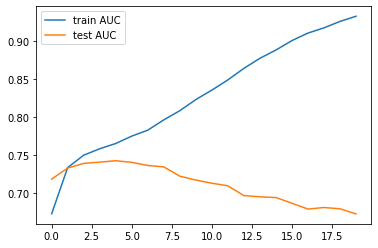

In [66]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()


- Generally, we found that after 20 epochs, the model overfits. We determined whether a model was overfit or not based on the difference between test and train AUC. This model had a test ROC of 0.758 and after submitting to Kaggle we had an ROC score of 0.750, which was our best of all neural networks we considered in this phase.
- We thought that increasing the size of our network would help. We tried several layers with different parameters, but the AUC always look roughly like above graph.

In [67]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [68]:
results.loc[3] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "More layers"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data
1,Deep Learning,0.755966,--,--,893.774806,0.038644,Deep Learning w/ all other data
2,Deep Learning,0.760161,--,0.917489,197.976691,0.040780,Adam optimizer
3,Deep Learning,0.673333,--,0.90511,827.497962,0.861070,More layers


# K-Fold Training

In [69]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [70]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [71]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, stratify=train_y, random_state=30)

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [73]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [74]:
# globals
batch_size = 128
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

kfold = KFold(n_splits=5, shuffle=True)
indexes_gen = kfold.split(train_x_tensor)

In [75]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(128),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.2),
        nn.Linear(32, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

- The architecture for our largest model taht we used.

In [76]:
data_loaders = []
test_idxs = []
for train_idx, test_idx in kfold.split(train_x_tensor):
  dataset = torch.utils.data.TensorDataset(train_x_tensor[train_idx], train_y_tensor[train_idx])
  data_loaders.append(torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True))
  test_idxs.append(test_idx)

In [77]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs
curr_fold = 0

start = time()
for epoch in range(epochs):
  # get fold
  if curr_fold+1 >= len(data_loaders):
    curr_fold = 0
  data_loader = data_loaders[curr_fold]
  test_idx = test_idxs[curr_fold]

  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

  # get test-train scores
  preds = model(train_x_tensor[test_idx])[:, 0].detach()
  loss = loss_fn(preds, train_y_tensor[test_idx]).detach()
  try:
    auc = roc_auc_score(train_y_tensor[test_idx], preds.detach().numpy())
  except:
    auc = 0

  losses.append(loss)
  roc_scores.append(auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
  curr_fold += 1
train_time = time() - start

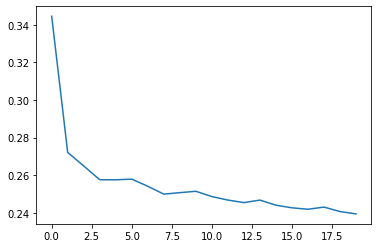

In [78]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

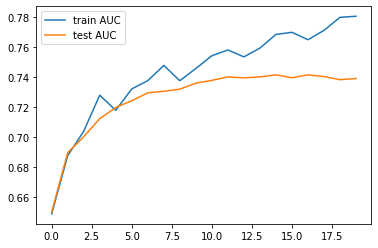

In [79]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [80]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [81]:
results.loc[4] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "K-Fold training"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data
1,Deep Learning,0.755966,--,--,893.774806,0.038644,Deep Learning w/ all other data
2,Deep Learning,0.760161,--,0.917489,197.976691,0.040780,Adam optimizer
3,Deep Learning,0.673333,--,0.90511,827.497962,0.861070,More layers
4,Deep Learning,0.739573,--,0.919028,470.775910,0.874678,K-Fold training


- It clearly overfits far too rapidly. We tried adding Dropout layers and BatchNorm layers, changing the learning rates, and so on, but we couldn't get the test AUC to be better than 0.75. We included K-Fold training as a last resort, in the hopes of reducing overfitting. 
- Despite the fact that it appeared to work, our test AUC never exceeded 0.75. There are a lot of Dropout layers in this model. Finally, we chose to return to our original model, which outperformed all of our previous models. 
- We experimented with different layer sizes after discovering that a single hidden layer produced the best results. However, a layer size of 64 worked poorly, so we went down to a layer size of 10. but it seemed identical to our base of 20 neurons. In the end, we stuck with our initial model of 1 hidden layer with 20 neurons.

# Other Layer Sizes

In [82]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [83]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [84]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [86]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [87]:
# globals
batch_size = 64
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

In [88]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [89]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 20),
        nn.ReLU(),
        nn.Linear(20, 20),
        nn.ReLU(),
        nn.Linear(20, num_output),
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.9))
loss_fn = nn.BCELoss()

In [90]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

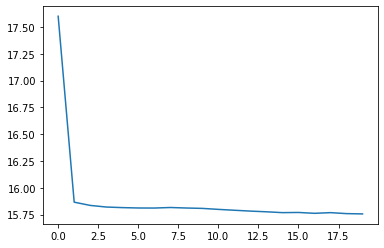

In [91]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

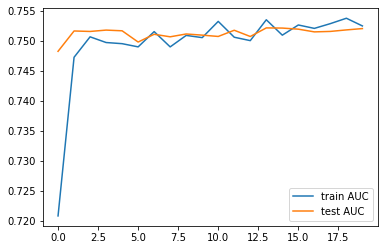

In [92]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [93]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [94]:
results.loc[5] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "Modifying Layer Sizes"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.740733,--,--,889.931723,0.034056,Deep Learning w/ Application Data
1,Deep Learning,0.755966,--,--,893.774806,0.038644,Deep Learning w/ all other data
2,Deep Learning,0.760161,--,0.917489,197.976691,0.040780,Adam optimizer
3,Deep Learning,0.673333,--,0.90511,827.497962,0.861070,More layers
4,Deep Learning,0.739573,--,0.919028,470.775910,0.874678,K-Fold training
5,Deep Learning,0.752036,--,0.917294,220.617161,0.040833,Modifying Layer Sizes


## Leakage
- The most common sources of leakage are while fitting data. We don't want our pipelines to match the test data when we're fitting them. Then, when it comes to training data, we want to avoid training on the test dataset. 
- Changes in class distributions to match would be a more modest leakage. We didn't do this because we separated the datasets with sklearn's train test split. 
- We don't have access to the actual labels for the real test dataset in our Kaggle competition, so it's nearly difficult to leak here, but we had to make sure we didn't leak anything from the test dataset we separated from our train dataset. We were very careful with our programming, and and our results were pretty realistic (train ROC > test > Kaggle), we are sure that we didn’t make some kind of mistake with our data.

## Test Data and Kaggle Submission

In [95]:
test = datasets['application_test']
test = test.merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')

test["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = test['REGION_POPULATION_RELATIVE'] * test['DAYS_ID_PUBLISH']
test["AMT_CREDIT/AMT_GOODS_PRICE"] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] / test['OBS_30_CNT_SOCIAL_CIRCLE']
test["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = test['DAYS_BIRTH'] + test['DAYS_LAST_PHONE_CHANGE']
test["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] + test['DEF_60_CNT_SOCIAL_CIRCLE']
test["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = test['AMT_GOODS_PRICE'] + test['DAYS_EMPLOYED']
test["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = test['REGION_POPULATION_RELATIVE'] * test['AMT_GOODS_PRICE']

test["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["CNT_PAYMENT"]
test["DAYS_BIRTH+MONTHS_BALANCE"] = test["DAYS_BIRTH"] + test["MONTHS_BALANCE_x"]
test["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["DAYS_ENTRY_PAYMENT"]
test["DAYS_BIRTH*DAYS_CREDIT"] = test["DAYS_BIRTH"] * test["DAYS_CREDIT"]

In [96]:
# convert test to tensor
test_numpy = scaler.transform(test)
test_tensor = torch.from_numpy(test_numpy).float()

preds = model(test_tensor)[:, 0].detach().numpy()
submit_df = test[['SK_ID_CURR']]
submit_df['TARGET'] = preds

submit_df.to_csv("submission.csv",index=False)

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.054992
1,100005,0.241191
2,100013,0.026251
3,100028,0.029597
4,100038,0.178483


In [97]:
!pip install -q kaggle
#!ls
!mkdir ~\.kaggle
!copy kaggle.json ~\.kaggle\kaggle.json

/bin/bash: copy: command not found


In [98]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "lgbm submission"

100% 877k/877k [00:00<00:00, 1.53MB/s]
Successfully submitted to Home Credit Default Risk

![Title](./i6.png)

## Conclusion

- Intially, We decided to use both Bayes and Linear regression as our baseline for the project, and then later decide which model is best but after the results, scores, we decided to go with the Linear regression as it has a concrete accuracy and score to proceed with.
- In phase 2 we have introduced new features into the data set and also combined all the data sets which resulted in improved ROC AUC score from 0.734212 to 0.745048.
- After that we tried to make chage to the imputer which lowered the training and testing time and also there was very slight imporvement in the ROC AUC score of 0.747196
- Then, we used LGBM (untuned) which resulted in improved ROC AUc score of 0.755799 and a slight increase in accuracy from 91.7 to 91.8.
- Then we tuned the LGBM without losing much of the AUC ROC score and the accuracy remained the same.

- For Phase 3, We were disappointed with the results of Part 3. After fine-tuning the architecture of our model, we expected to improve our LGBM scores, but instead found that each adjustment had no effect or worsened the model. One of the most significant changes we made was when we switched from SGD to Adam as our optimizer. Our results remained the same, but we saw a 5x increase in speed.

- We then added layers after that update. This refers to the experiment "More Layers." As you can see, we did a lot worse than they did. We did, however, try a number of other things. As illustrated in the train/test AUC graphs, as the network size was increased, it appeared to overfit significantly more quickly. We believe that a wider network was not the solution. We tried using Dropout or BatchNorm layers to reduce overfitting, but they didn't boost performance over 0.74. Given that our initial model had a score of 0.75, it was evident that our initial model was simply superior.



- ref: https://www.kaggle.com/competitions/home-credit-default-risk
- Multiple notebooks and stackoverflow were referred to complete the project

## Future Tasks

- Sometimes it's better to be simple, but I think the experiments at this stage show that. No matter what I tried, a single hidden layer of about 20 neurons gave the best results. There may have been more room for experimentation here, but I think We've run out of almost every opportunity to improve performance. For what I left in the table, I probably had more opportunities to use feature engineering to improve the performance of my model  than to optimize it.